# Load packages and set work dir

In [1]:
def date(string):
    string2 = str(string)
    if len(string2)<6:
        a= 0
    else:
        a= 1
    return a    

def split(string):
    try:
        date_time_str = string.split(" ")[0]
    except:
        date_time_str = ''
    return date_time_str 

def naTyear(string):
    if type(string) == pd._libs.tslibs.nattype.NaTType:
        a = 0
    else:
        a = 1
    return a

def year(date):
    month = date.month
    day = date.day
    
    if (month == 1)&(day == 1):
        year = date.year
    else:
        year = date
    return year

def get_year(date):
    year = date.year
    
    return year


def tojulian(string):
    try:
        dt = string.split('/')
        dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
        ju_dt = dt2.strftime('%j')
        return(ju_dt)
    except:
        return None
    
def tojulian(string):
    
    try:
        if len(string)>4:
            try:
                dt = string.split('/')
                dt2 = datetime(int(dt[2]), int(dt[0]), int(dt[1]))
                ju_dt = dt2.strftime('%j')
                return(ju_dt)

            except:
                return string
        else:
            return string
    except:
        return string
    
def str2nb(str0):
    
    try:
        str0b = str0[1:-1]
        nb = float(str0b)
    except:
        nb = str0
        
    return nb

In [2]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import pyxlsb
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from kneed import KneeLocator
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
os.chdir("./corn dataset/")

# Test results

## Read data 

In [416]:
w_old = pd.read_csv('DH_stress_NA_Corn_West_Market_Segment_Version2.csv')

w_new = pd.read_csv('DH_stress_west_V3.csv')
#w_new = pd.read_csv('DH_stress_west2.csv')
n_old = pd.read_csv('DH_stress_north_V3.csv')

#w_new = pd.read_csv('Deep_features_stress_characterization__NA_west_market.csv')
n_new = pd.read_csv('Deep_features_stress_NA_North_market.csv')
#n_new = pd.read_csv('DH_stress_north.csv')
#n_old = pd.read_csv('DH_stress_north.csv')

In [213]:
dt = pd.read_csv('Environment_7stages_NA_corn.csv')
print(dt.shape)
dt.columns[80:104]

(225152, 104)


Index(['precsum30DBP.Planting', 'precsumPlanting.VE', 'precsumVE.V6',
       'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4', 'precsumR4.R6',
       'precsumR6.Harvest', 'trial_id', 'wsy_c', 'year', 'Market_segment',
       'GrainYieldPotential', 'HPR30BDP.Planting', 'HPRPlanting.VE',
       'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4', 'HPRR4.R6',
       'HPRR6.Harvest', 'ygsmn', 'yield_gap', 'Percent_yield_gap'],
      dtype='object')

In [210]:
dt2 = dt[['trial_id','ygsmn','WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
      'HeatVE.V6', 'HeatV6.VT',
       'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6', 'HeatR6.Harvest',
       'VaporPressureDeficitVE.V6', 'VaporPressureDeficitV6.VT',
       'VaporPressureDeficitVT.R2', 'VaporPressureDeficitR2.R4',
       'VaporPressureDeficitR4.R6', 'VaporPressureDeficitR6.Harvest',
       'et0sumVE.V6','et0sumV6.VT', 'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6',
       'et0sumR6.Harvest','rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4','HPRR4.R6',
       'HPRR6.Harvest','tempavgVE.V6',
       'tempavgV6.VT', 'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6',
       'tempavgR6.Harvest','precsumVE.V6',
       'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4', 'precsumR4.R6',
       'precsumR6.Harvest','wsy_c']]
dt2.shape

(225152, 45)

In [406]:
dt2 = dt

In [330]:
w_a2.columns

Index(['trial_id', 'stress_old', 'wsy_c_x', 'stress_new', 'ygsmn',
       'WaterDeficitVT.R2', 'WaterDeficitR2.R4', 'HeatVT.R2', 'HeatR2.R4',
       'HeatR4.R6', 'VaporPressureDeficitVE.V6', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6', 'et0sumVT.R2',
       'et0sumR2.R4', 'et0sumR4.R6', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'HPRVT.R2', 'HPRR2.R4', 'HPRR4.R6', 'wsy_c_y'],
      dtype='object')

## PCA Visulaization 

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [275]:
X = StandardScaler().fit_transform(w_a2.drop(['trial_id',
       'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6', 
       'stress_old', 'wsy_c_x', 'stress_new', 'ygsmn','wsy_c_y'], axis=1))
pca = PCA(n_components=5).fit(X)
dt_pca = pca.transform(X)
pca_df = pd.DataFrame(dt_pca,columns=['P1','P2','P3',"P4",'P5'])

In [276]:
pca.explained_variance_ratio_

array([0.48760832, 0.15261826, 0.0773017 , 0.06134261, 0.05915695])

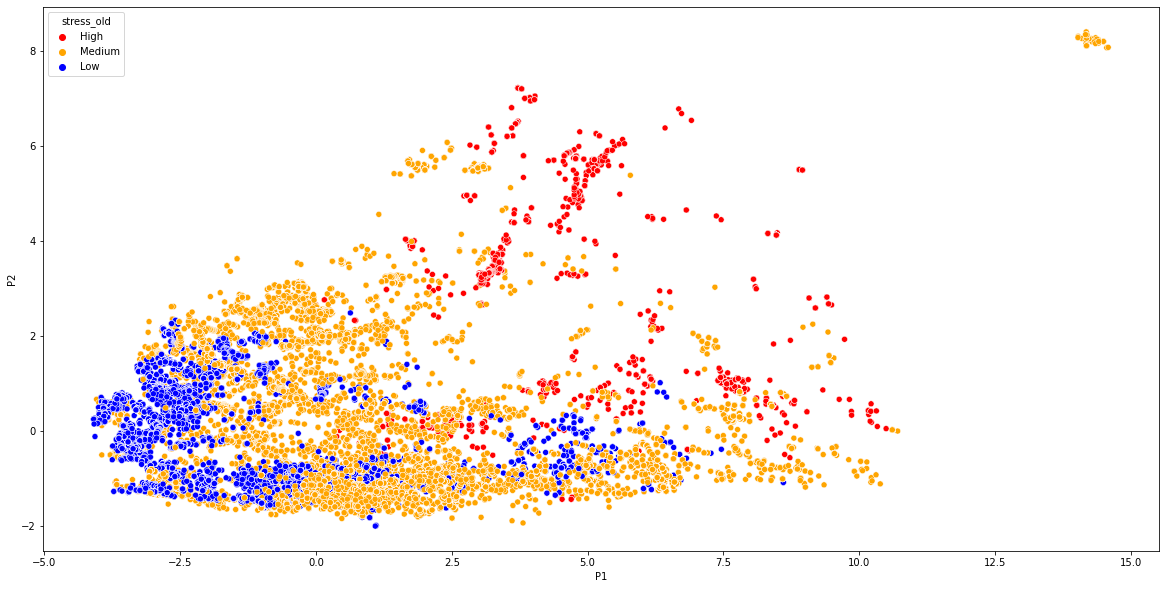

In [277]:
sns.scatterplot(x='P1',y='P2', hue=w_a2['stress_old'],  palette=my_pal, data=pca_df)
plt.show()

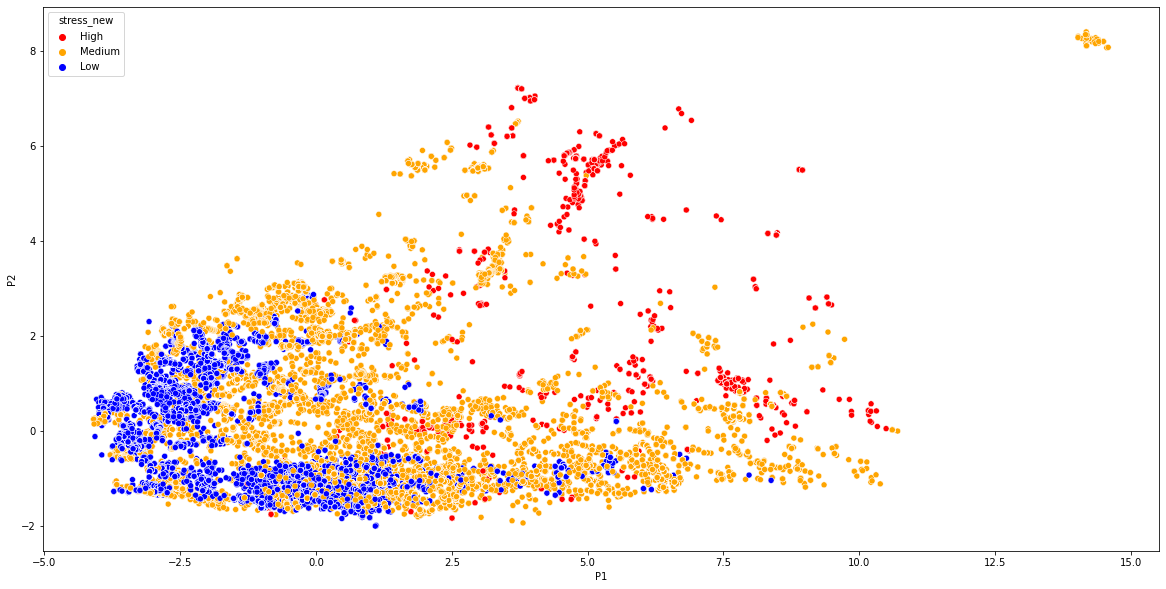

In [278]:
sns.scatterplot(x='P1',y='P2', hue=w_a2['stress_new'],  palette=my_pal, data=pca_df)
plt.show()

In [245]:
w_new.head(2)

,trial_id,Stress,wsy_c
0,09SUABYG6818213,High,LIRR
1,09SURHYG4818213,High,LIRR


In [385]:
print(w_old.head(2))
print(w_new.head(2))

          trial_id  year Stress_class wsy_c    DH_stress
0  09SUABYG6615C02  2009       Medium  LIRR  LIRR_Medium
1  09SUABYG6616312  2009       Medium  LIRR  LIRR_Medium
          trial_id wsy_c Stress
0  09SUABYG6615207   IRR    Low
1  09SUABYG6615C01   IRR    Low


In [358]:
print(n_old.head(3))
print(n_new.head(3))

          trial_id Stress wsy_c
0  09SUADYG3433441    Low   IRR
1  09SUADYG3443441    Low   IRR
2  09SUADYG3453441    Low   IRR
          trial_id  Stress wsy_c
0  09SUABYG6615H03     Low  LIRR
1  09SUABYG6616H01  Medium  LIRR
2  09SUABYG6716H01  Medium  LIRR


In [417]:
w_a = pd.merge(w_old[['trial_id',  'Stress_class', 'wsy_c']], w_new[['trial_id','Stress']], on=['trial_id'])
w_a.rename(columns={'Stress_class':'stress_old', 'Stress':'stress_new'}, inplace=True)

n_a = pd.merge(n_old, n_new[['trial_id','Stress']], on=['trial_id'])
n_a.rename(columns={'Stress_x':'stress_old', 'Stress_y':'stress_new'}, inplace=True)

In [418]:
print(w_a['stress_old'].value_counts())
print(w_a['stress_new'].value_counts())

Medium    34020
Low       29928
High       2016
Name: stress_old, dtype: int64
Medium    43213
Low       20805
High       1946
Name: stress_new, dtype: int64


In [160]:
n_a = pd.read_csv('DH_stress_new_old.csv')
n_a2 = n_a.copy()
n_a2.shape

(29167, 46)

In [142]:
n_a.groupby(['stress_old','stress_new']).size()

stress_old  stress_new
High        High            215
            Medium           46
Low         High             11
            Low           12238
            Medium          265
Medium      High            263
            Low            8379
            Medium         7750
dtype: int64

In [95]:
(203+ 6244 + 4945)/n_a.shape[0]

0.7417632504232322

In [143]:
print(n_a.groupby(['stress_old']).size())
print(n_a.groupby(['stress_new']).size())

stress_old
High        261
Low       12514
Medium    16392
dtype: int64
stress_new
High        489
Low       20617
Medium     8061
dtype: int64


In [101]:
print(w_a.groupby(['stress_old']).size())
print(w_a.groupby(['stress_new']).size())

NameError: name 'w_a' is not defined

In [224]:
w_a.groupby(['stress_old','stress_new']).size()

stress_old  stress_new
High        High           1117
            Low              24
            Medium          805
Low         High             33
            Low           16509
            Medium         4263
Medium      High            863
            Low           19519
            Medium        22831
dtype: int64

In [39]:
(1026 + 24083 + 21113)/w_a.shape[0]

0.7007155418106846

In [177]:
n_a = pd.read_csv('DH_stress_less_more_var.csv')
n_a.groupby(['stress_old','stress_new']).size()
n_a2 = n_a.copy()

In [419]:
w_a2 = pd.merge(w_a, dt2, on=['trial_id'], how='left')
n_a2 = pd.merge(n_a, dt2, on=['trial_id'], how='left')

In [420]:
lirr = w_a2.loc[w_a2.wsy_c_x=='LIRR']
irr = w_a2.loc[w_a2.wsy_c_x=='IRR']

In [422]:
lirr['stress_new'].value_counts()

Medium    22462
Low       10232
High       1927
Name: stress_new, dtype: int64

## Quantile distribution

In [178]:
n_a2.columns

Index(['wsy_c', 'year', 'Water_deficit_VEVT', 'Water_deficit_VTR4',
       'Water_deficit_R4Harvest', 'Heat_VEVT', 'Heat_VTR4', 'Heat_R4Harvest',
       'VPD_VEVT', 'VPD_VTR4', 'VPD_R4Harvest', 'VPD_max_VEVT', 'VPD_max_VTR4',
       'VPD_max_R4Harvest', 'et_VEVT', 'et_VTR4', 'et_R4Harvest', 'Max_T_VEVT',
       'Max_T_VTR4', 'Max_T_R4Harvest', 'Avg_T_VEVT', 'Avg_T_VTR4',
       'Avg_T_R4Harvest', 'HPR_VEVT', 'HPR_VTR4', 'HPR_R4Harvest', 'P_VEVT',
       'P_VTR4', 'P_R4Harvest', 'RH_VEVT', 'RH_VTR4', 'RH_R4Harvest',
       'yield_potential_x', 'ygsmn_x', 'yield_gap_x', 'Percent_yield_gap_x',
       'Cluster', 'stress_old', 'trial_id', 'yield_potential_y',
       'market_segment', 'ygsmn_y', 'yield_gap_y', 'Percent_yield_gap_y',
       'stress_new'],
      dtype='object')

In [179]:
n_a3 = n_a2.drop(['VPD_max_VEVT', 'VPD_max_VTR4',
       'VPD_max_R4Harvest','Max_T_VEVT',
       'Max_T_VTR4', 'Max_T_R4Harvest', 'Avg_T_VEVT', 'Avg_T_VTR4',
       'Avg_T_R4Harvest','P_VEVT',
       'P_VTR4', 'P_R4Harvest'], axis=1)
n_a3.shape

(34853, 33)

In [182]:
qts = [0.25,0.5,0.75]

vars_w_old= []
vars_w_new = []
vars_n_old= []
vars_n_new = []

for qt in qts:

    var_n_old = n_a3.loc[n_a2.stress_old!='High'].groupby(['stress_old']).quantile(qt)
    var_n_new = n_a3.loc[n_a2.stress_new!='High'].groupby(['stress_new']).quantile(qt)
    
#     var_n_old = n_a3.groupby(['stress_old']).quantile(qt)
#     var_n_new = n_a3.groupby(['stress_new']).quantile(qt)
    
   
#     vars_w_old.append(var_w_old.std(axis=0))
#     vars_w_new.append(var_w_new.std(axis=0))
    vars_n_old.append(var_n_old.std(axis=0))
    vars_n_new.append(var_n_new.std(axis=0))

In [183]:
vars_n_old2 = np.asarray(vars_n_old).flatten()
vars_n_new2 = np.asarray(vars_n_new).flatten()

ts = vars_n_old2 > vars_n_new2
pd.DataFrame(ts).value_counts()

True     67
False    17
dtype: int64

In [282]:
qts = [0.25,0.5,0.75]

old= w_a2.groupby(['stress_old']).quantile(qts)
new= w_a2.groupby(['stress_new']).quantile(qts)

In [110]:
qts = [0.25,0.5,0.75]

old= n_a2.groupby(['stress_old']).quantile(qts)
new= n_a2.groupby(['stress_new']).quantile(qts)

In [111]:
pd.options.display.max_columns = None
old

year  Water_deficit_VEVT  Water_deficit_VTR4  \
stress_old                                                        
High       0.25  2019.0              0.7535              0.7275   
           0.50  2020.0              0.8615              0.7380   
           0.75  2020.0              0.8745              0.7490   
Low        0.25  2016.0              0.9650              0.6560   
           0.50  2018.0              1.0000              0.7140   
           0.75  2019.0              1.0000              0.7810   
Medium     0.25  2017.0              0.8395              0.4840   
           0.50  2018.0              0.8955              0.6180   
           0.75  2020.0              0.9950              0.7310   

                 Water_deficit_R4Harvest  Heat_VEVT  Heat_VTR4  \
stress_old                                                       
High       0.25                  0.31500     0.9845     0.9885   
           0.50                  0.35350     0.9900     0.9945   
           0.75                  0.40600     0.9940     1.0000   
Low        0.25                  0.90300     1.0000     1.0000   
           0.50                  0.94400     1.0000     1.0000   
           0.75                  1.00000     1.0000     1.0000   
Medium     0.25                  0.21875     1.0000     1.0000   
           0.50                  0.50600     1.0000     1.0000   
           0.75                  0.77300     1.0000     1.0000   

                 Heat_R4Harvest  VPD_VEVT  VPD_VTR4  VPD_R4Harvest  \
stress_old                                                           
High       0.25             1.0    0.4300   0.40900         0.5565   
           0.50             1.0    0.4925   0.49100         0.5815   
           0.75             1.0    0.5135   0.62150         0.6095   
Low        0.25             1.0    0.7190   0.75150         0.8235   
           0.50             1.0    0.7390   0.78100         0.8480   
           0.75             1.0    0.7630   0.79050         0.8600   
Medium     0.25             1.0    0.6670   0.69100         0.7280   
           0.50             1.0    0.6970   0.73100         0.7765   
           0.75             1.0    0.7320   0.76575         0.8280   

                 VPD_max_VEVT  VPD_max_VTR4  VPD_max_R4Harvest  et_VEVT  \
stress_old                                                                
High       0.25         3.315      2.645000            2.72500  172.730   
           0.50         3.450      3.455000            2.89500  179.675   
           0.75         3.830      3.965000            3.05000  200.475   
Low        0.25         1.770      1.600000            1.17000  132.475   
           0.50         1.915      1.660000            1.24175  140.810   
           0.75         2.040      1.843875            1.39400  149.455   
Medium     0.25         1.960      1.754250            1.37000  137.245   
           0.50         2.180      1.970000            1.68500  155.690   
           0.75         2.365      2.215000            1.98500  164.505   

                 et_VTR4  et_R4Harvest  Max_T_VEVT  Max_T_VTR4  \
stress_old                                                       
High       0.25  71.3550     130.65500    30.19500     30.9650   
           0.50  74.9300     138.52500    31.85000     31.8400   
           0.75  79.5550     158.40000    32.42500     33.0200   
Low        0.25  59.5150      89.39000    27.41500     27.4850   
           0.50  63.7350      96.64675    28.19250     28.3700   
           0.75  66.7600     102.24000    29.32500     28.9350   
Medium     0.25  62.9875     102.06500    27.85225     27.7325   
           0.50  66.5500     112.79500    28.46000     29.0400   
           0.75  71.6450     127.92000    29.01000     29.5000   

                 Max_T_R4Harvest  Avg_T_VEVT  Avg_T_VTR4  Avg_T_R4Harvest  \
stress_old                                                                  
High       0.25           24.555    21.59500      24.040           15.265   

In [112]:
new

year  Water_deficit_VEVT  Water_deficit_VTR4  \
stress_new                                                        
High       0.25  2018.0            0.835500             0.65525   
           0.50  2019.0            0.877000             0.73800   
           0.75  2020.0            0.956625             0.77650   
Low        0.25  2017.0            0.923500             0.63550   
           0.50  2018.0            1.000000             0.71250   
           0.75  2019.0            1.000000             0.78600   
Medium     0.25  2017.0            0.835500             0.42850   
           0.50  2017.0            0.872500             0.51900   
           0.75  2020.0            0.913000             0.66900   

                 Water_deficit_R4Harvest  Heat_VEVT  Heat_VTR4  \
stress_new                                                       
High       0.25                 0.316625       0.99     0.9765   
           0.50                 0.389000       1.00     0.9890   
           0.75                 0.462125       1.00     0.9975   
Low        0.25                 0.794750       1.00     1.0000   
           0.50                 0.924000       1.00     1.0000   
           0.75                 1.000000       1.00     1.0000   
Medium     0.25                 0.174000       1.00     1.0000   
           0.50                 0.380500       1.00     1.0000   
           0.75                 0.498250       1.00     1.0000   

                 Heat_R4Harvest  VPD_VEVT  VPD_VTR4  VPD_R4Harvest  \
stress_new                                                           
High       0.25        0.954375    0.4900   0.41575       0.516500   
           0.50        0.999500    0.6305   0.58925       0.576500   
           0.75        1.000000    0.7155   0.63950       0.634625   
Low        0.25        1.000000    0.7160   0.75050       0.814000   
           0.50        1.000000    0.7390   0.78150       0.840000   
           0.75        1.000000    0.7555   0.79400       0.860500   
Medium     0.25        1.000000    0.6495   0.68250       0.718000   
           0.50        1.000000    0.6850   0.69650       0.748000   
           0.75        1.000000    0.7030   0.72900       0.781000   

                 VPD_max_VEVT  VPD_max_VTR4  VPD_max_R4Harvest   et_VEVT  \
stress_new                                                                 
High       0.25       2.06500       2.53500            2.56125  125.9600   
           0.50       2.59500       2.84600            2.92500  159.0450   
           0.75       3.46000       3.92375            3.30000  181.4225   
Low        0.25       1.81500       1.58000            1.16500  132.1050   
           0.50       1.92000       1.65500            1.29000  140.5750   
           0.75       2.06175       1.84500            1.45500  150.9550   
Medium     0.25       2.14000       1.97500            1.65500  148.2000   
           0.50       2.25000       2.18500            1.86000  160.9400   
           0.75       2.47500       2.27000            2.05000  174.5900   

                  et_VTR4  et_R4Harvest  Max_T_VEVT  Max_T_VTR4  \
stress_new                                                        
High       0.25  68.44500      132.0850    27.82500    31.62625   
           0.50  73.38000      139.8550    29.61750    32.88500   
           0.75  77.61875      151.9375    31.90625    33.52050   
Low        0.25  60.54000       92.2000    27.61000    27.28500   
           0.50  64.77500       98.0000    28.31000    28.13500   
           0.75  67.07500      104.6850    29.04200    29.01500   
Medium     0.25  62.21500      112.3600    27.97250    28.21000   
           0.50  68.82000      117.6200    28.76000    29.27850   
           0.75  73.67500      136.7950    29.55500    29.55350   

                 Max_T_R4Harvest  Avg_T_VEVT  Avg_T_VTR4  Avg_T_R4Harvest  \
stress_new                                                                  
High       0.25        28.042500    21.45425    24.498

In [235]:
vars_w_old2 = np.asarray(vars_w_old).flatten()
vars_w_new2 = np.asarray(vars_w_new).flatten()

In [236]:
ts = vars_w_old2 > vars_w_new2
pd.DataFrame(ts).value_counts()

False    95
dtype: int64

## Histogram plot 

In [353]:
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}
my_pal2 = {"Very_high": "purple",'High':'red', "Medium": "orange", "Low":"blue"}

In [352]:
dfs['Stress'].value_counts()

Medium       3560
Low          1620
High          798
Very_high     270
Name: Stress, dtype: int64

In [351]:
dfs.columns

Index(['year', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest', 'wsy_c', 'ygsmn', 'yield_gap',
       

Text(0.5, 0, 'Stress group')

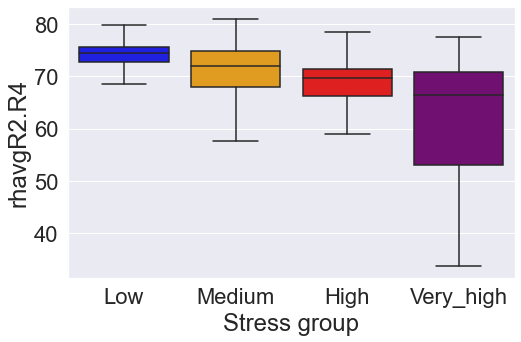

In [363]:
plt.figure(figsize=(8,5))
sns.set(font_scale=2)

dt = dfs.copy()
var = 'rhavgR2.R4'
my_order = dt.groupby(by=["Stress"])[var].mean().sort_values(ascending=False).index
sns.boxplot(x=dt['Stress'], y=dt[var], showfliers = False, palette=my_pal2, order=my_order)
#sns.violinplot(x=dt['Stress_class'], y=dt['ygsmn'],showextrema=False, legend=False)
plt.legend([],[], frameon=False)
#plt.ylim(0,65)
#plt.ylabel('Relative humidity')
plt.xlabel('Stress group')

In [167]:
n_a3.columns

Index(['wsy_c_x', 'year', 'Water_deficit_VEVT', 'Water_deficit_VTR4',
       'Water_deficit_R4Harvest', 'Heat_VEVT', 'Heat_VTR4', 'Heat_R4Harvest',
       'VPD_VEVT', 'VPD_VTR4', 'VPD_R4Harvest', 'et_VEVT', 'et_VTR4',
       'et_R4Harvest', 'HPR_VEVT', 'HPR_VTR4', 'HPR_R4Harvest', 'RH_VEVT',
       'RH_VTR4', 'RH_R4Harvest', 'yield_potential_x', 'ygsmn_x',
       'yield_gap_x', 'Percent_yield_gap_x', 'Cluster', 'stress_new',
       'trial_id', 'yield_potential_y', 'market_segment', 'ygsmn_y',
       'yield_gap_y', 'Percent_yield_gap_y', 'stress_old', 'wsy_c_y'],
      dtype='object')

In [185]:
print(n_a3['stress_old'].value_counts())
print(n_a3['stress_new'].value_counts())

Low       27686
Medium     6848
High        319
Name: stress_old, dtype: int64
Low       23319
Medium    11086
High        448
Name: stress_new, dtype: int64


In [303]:
n_a2.columns[:56]

Index(['year', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest', 'wsy_c_x', 'ygsmn_x',
       'yield_ga

In [330]:
print(n_a2['stress_old'].value_counts())
print(n_a2['stress_new'].value_counts())

Medium    16392
Low       12514
High        261
Name: stress_old, dtype: int64
Low       15965
Medium    11962
High       1240
Name: stress_new, dtype: int64


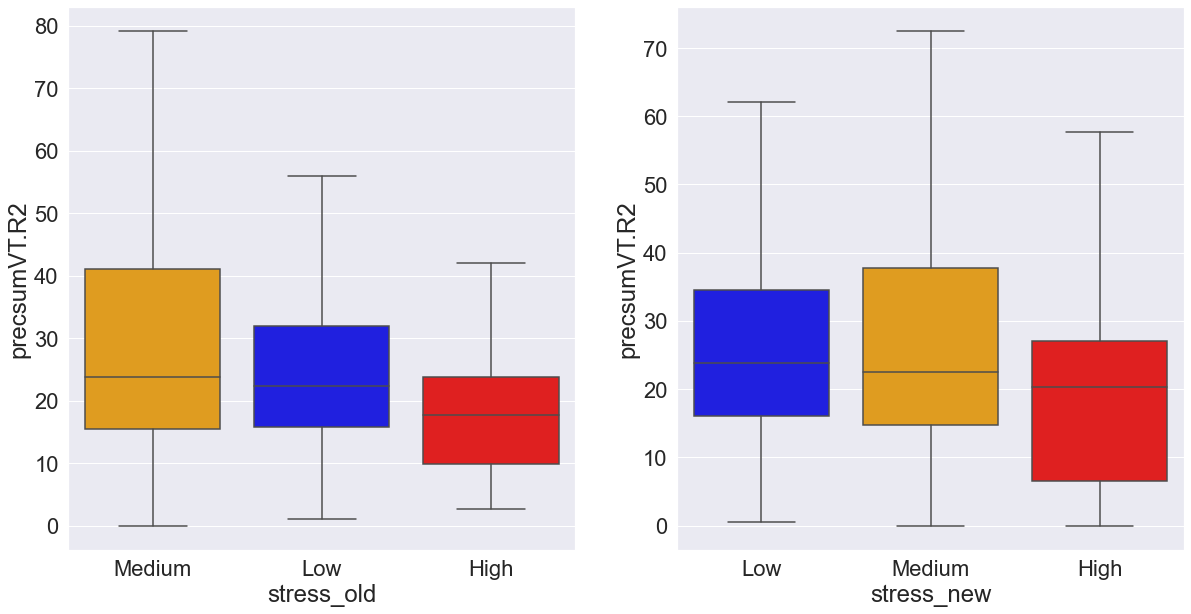

In [338]:
plt.rcParams['figure.figsize']=(20,10)

fig, axs = plt.subplots(ncols=2)

data_all = n_a2.copy()
var = 'precsumVT.R2'
my_order = data_all.groupby(by=["stress_old"])[var].median().sort_values(ascending=False).index

sns.boxplot(x=data_all['stress_old'], y=data_all[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[0])


my_order = data_all.groupby(by=["stress_new"])[var].median().sort_values(ascending=False).index
sns.boxplot(x=data_all['stress_new'], y=data_all[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[1])

plt.show()

# Read aggregated varibles by stages

## Data process 

In [247]:
#dt = pd.read_csv('Selected_var_stage3.csv')
os.chdir('C:\\Users\\s1052014\\OneDrive - Syngenta\\Desktop\\NA_corn_WO\\Data2021\\Drought Stress\\corn dataset')

#dt = pd.read_csv('NA_var_3stages.csv')
dt= pd.read_csv('Environment_7stages_NA_corn.csv')
dt = dt.loc[dt.year>2015]
dt = dt.loc[dt.Market_segment=='West']
#dt = dt.loc[dt.year>2015]
print(dt.shape)

dt = dt[['trial_id','ygsmn','year','yield_gap',
       'Percent_yield_gap','WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
      'HeatVE.V6', 'HeatV6.VT',
       'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6', 'HeatR6.Harvest',
       'VaporPressureDeficitVE.V6', 'VaporPressureDeficitV6.VT',
       'VaporPressureDeficitVT.R2', 'VaporPressureDeficitR2.R4',
       'VaporPressureDeficitR4.R6', 'VaporPressureDeficitR6.Harvest',
       'et0sumVE.V6','et0sumV6.VT', 'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6',
       'et0sumR6.Harvest','rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4','HPRR4.R6',
       'HPRR6.Harvest','tempavgVE.V6',
       'tempavgV6.VT', 'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6',
       'tempavgR6.Harvest','precsumVE.V6',
       'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4', 'precsumR4.R6',
       'precsumR6.Harvest','wsy_c']]
dt2 = dt.drop(['trial_id', 'ygsmn', 'yield_gap',
       'Percent_yield_gap'],axis=1).drop_duplicates()
dt3 = dt.groupby(dt2.columns.to_list()).agg('mean')
dt3 = dt3.reset_index()

dt3.columns

(29170, 104)


Index(['year', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest', 'wsy_c', 'ygsmn', 'yield_gap',
       

In [376]:
dt3.columns

Index(['year', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest',
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
       'rhavgR6.Harvest', 'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest',
       'precsumVE.V6', 'precsumV6.VT', 'precsumVT.R2', 'precsumR2.R4',
       'precsumR4.R6', 'precsumR6.Harvest', 'wsy_c', 'ygsmn', 'yield_gap',
       

In [ ]:
dt_x = pd.get_dummies(dt3.drop(['year','ygsmn', 'yield_gap','Percent_yield_gap'],axis=1))
dt_y = dt3[['yield_gap']]

dt2 = dt.drop(['trial_id','yield_potential', 'market_segment', 'ygsmn', 'yield_gap',
       'Percent_yield_gap'],axis=1).drop_duplicates()

dt_x0, dt_y =  dt.drop(['trial_id','yield_potential', 'market_segment', 'wsy_c','ygsmn','year', 'yield_gap',],axis=1), dt[['yield_gap']]
dt_x = dt_x0.drop(['Percent_yield_gap'], axis=1)

print(dt_x.shape)
print(dt_y.shape)

# var_y = 'yield_gap'
# dt_y = dt2[[var_y]].mean() + 3*dt2[[var_y]].std() - dt2[[var_y]] 
# dt_y.head(2)
# dt_y[var_y].loc[dt_y[var_y]<0] = 0
# dt3b = pd.get_dummies(dt3b)
# dt3c= MinMaxScaler().fit_transform(dt3b)
# dt3c= pd.DataFrame(dt3c)
# dt3c.shape

### Calculate integrative risk factor 

#### Derive factors from range 0-1

In [381]:
dt_factor = dt3.drop(['year','wsy_c', 'ygsmn', 'yield_gap',
       'Percent_yield_gap'], axis=1)
dt_factor2 = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(dt_factor)
dt_factor2 = pd.DataFrame(dt_factor2, columns=dt_factor.columns.to_list())
dt_factor2[['et0sumVE.V6', 'et0sumV6.VT','et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest','HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',  'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest']] = 1 - dt_factor2[['et0sumVE.V6', 'et0sumV6.VT',
       'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest','HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6', 'HPRR6.Harvest', 'tempavgVE.V6', 'tempavgV6.VT',
       'tempavgVT.R2', 'tempavgR2.R4', 'tempavgR4.R6', 'tempavgR6.Harvest']] 

#### Get weight of each factor 

In [385]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(dt_factor2, dt_y)

feature_list = list(dt_factor2.columns)
importances = list(rf.feature_importances_)

#### Derive the integrative factor 

In [392]:
imp_df = pd.DataFrame(importances,columns=['weights'])
print(imp_df.shape)
ts = np.dot(dt_factor2, imp_df)
ts = pd.DataFrame(ts, columns=['ISF'])
ts.shape

(48, 1)

In [406]:
dt3['ISF'] = ts['ISF']
print(dt3.shape)
dt3.head(2)

(6248, 54)


,year,WaterDeficitVE.V6,WaterDeficitV6.VT,WaterDeficitVT.R2,WaterDeficitR2.R4,WaterDeficitR4.R6,WaterDeficitR6.Harvest,HeatVE.V6,HeatV6.VT,HeatVT.R2,HeatR2.R4,HeatR4.R6,HeatR6.Harvest,VaporPressureDeficitVE.V6,VaporPressureDeficitV6.VT,VaporPressureDeficitVT.R2,VaporPressureDeficitR2.R4,VaporPressureDeficitR4.R6,VaporPressureDeficitR6.Harvest,et0sumVE.V6,et0sumV6.VT,et0sumVT.R2,et0sumR2.R4,et0sumR4.R6,et0sumR6.Harvest,rhavgVE.V6,rhavgV6.VT,rhavgVT.R2,rhavgR2.R4,rhavgR4.R6,rhavgR6.Harvest,HPRVE.V6,HPRV6.VT,HPRVT.R2,HPRR2.R4,HPRR4.R6,HPRR6.Harvest,tempavgVE.V6,tempavgV6.VT,tempavgVT.R2,tempavgR2.R4,tempavgR4.R6,tempavgR6.Harvest,precsumVE.V6,precsumV6.VT,precsumVT.R2,precsumR2.R4,precsumR4.R6,precsumR6.Harvest,wsy_c,ygsmn,yield_gap,Percent_yield_gap,ISF
0,2016,0.771,0.893,0.927,0.952,0.923,0.230,0.98,0.858,0.994,1.0,1.0,1.0,0.393,0.254,0.481,0.552,0.667,0.631,142.88,246.58,93.33,94.03,165.79,71.71,48.28,40.59,53.37,51.64,62.35,46.68,1.644677,4.299843,2.767974,1.682447,0.238207,67.20,25.18,27.39,25.41,23.10,20.25,16.80,15.31,6.37,9.18,13.73,85.01,0.25,IRR,155.316653,3.758335,19.483332,0.381555
1,2016,0.771,0.893,0.927,0.952,0.935,0.283,0.98,0.858,0.994,1.0,1.0,1.0,0.393,0.254,0.481,0.557,0.666,0.622,142.88,246.58,93.33,88.52,165.67,77.34,48.28,40.59,53.37,52.04,62.80,45.66,1.644677,4.299843,2.767974,1.977778,0.233686,67.84,25.18,27.39,25.41,23.14,20.34,16.96,15.31,6.37,9.18,11.70,87.04,0.25,IRR,155.673313,3.532669,18.495648,0.383394


In [407]:
dt3[['ygsmn','ISF','yield_gap']].corr().round(2)

,ygsmn,ISF,yield_gap
ygsmn,1.00,0.26,-0.78
ISF,0.26,1.00,-0.66
yield_gap,-0.78,-0.66,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


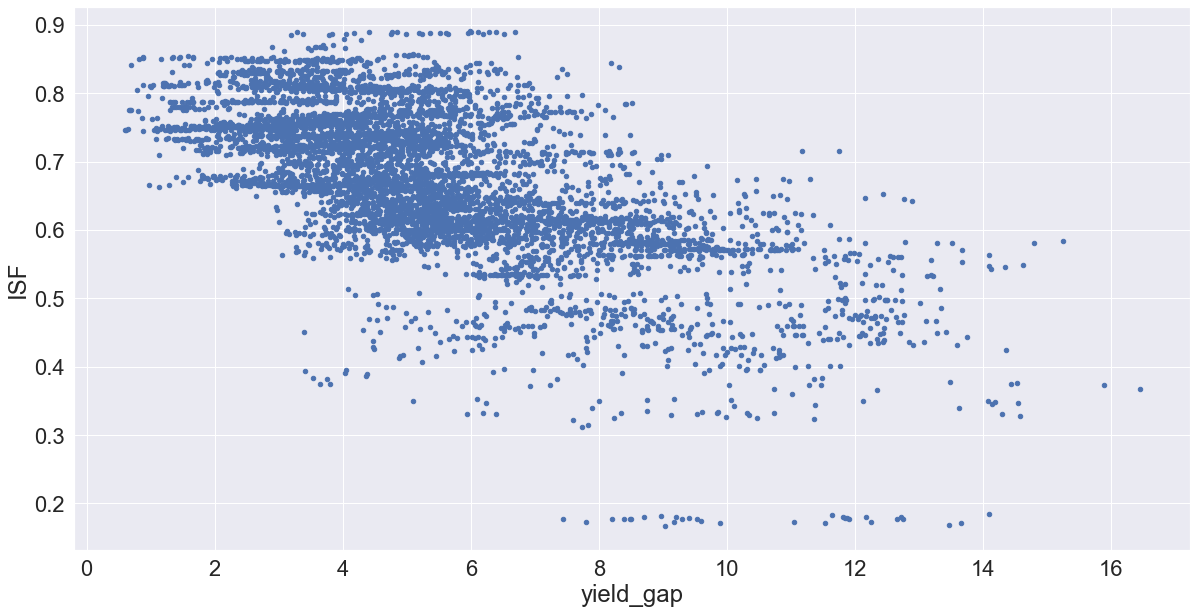

In [411]:
dt3.plot.scatter(x='yield_gap', y='ISF')
plt.show()

### Create data for 1-D CNN

In [26]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
dt3d = np.empty((dt3c.shape[0],8,7))

In [27]:
type(dt3c)

pandas.core.frame.DataFrame

In [28]:
for i in range(dt3c.shape[0]):
    dt_ind = dt3c.iloc[i,].to_numpy()
    dt_ind2 = dt_ind.reshape(7,8)
    dt_ind3 = dt_ind2.T
    
    dt3d[i,:,:] = dt_ind3

In [29]:
dt3d.shape

(76948, 8, 7)

### Define color palate 

In [19]:
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}

# Baseline model: RF 

In [ ]:
rf = RandomForestRegressor(n_estimators=300)
rf_model = rf.fit(x_train, y_train)

fea_pred =rf_model.predict(x_test)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_test, fea_pred)
print("Testing R-square: {}".format(r2))

# Load DL packages 

In [219]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model
from keras.models import Model
from sklearn.manifold import TSNE

# MLP

In [18]:
dt_x.head(5)

,Water_deficit_VEVT,Water_deficit_VTR4,Water_deficit_R4Harvest,Heat_VEVT,Heat_VTR4,Heat_R4Harvest,VPD_VEVT,VPD_VTR4,VPD_R4Harvest,VPD_max_VEVT,...,Avg_T_R4Harvest,HPR_VEVT,HPR_VTR4,HPR_R4Harvest,P_VEVT,P_VTR4,P_R4Harvest,RH_VEVT,RH_VTR4,RH_R4Harvest
3,1.0000,0.6920,0.509,1.0,1.0,1.0,0.7385,0.6980,0.8295,1.920,...,14.220,0.161708,1.226682,0.170187,118.485,17.690,83.555,66.385,67.785,71.055
8,0.9825,0.6615,0.613,1.0,1.0,1.0,0.7290,0.7135,0.8675,1.980,...,12.975,0.248117,0.824690,0.105394,82.985,26.610,123.110,65.465,69.415,72.975
9,1.0000,0.7900,0.818,1.0,1.0,1.0,0.7975,0.8215,0.8895,1.555,...,12.265,0.144920,0.433623,0.150926,135.420,48.925,81.265,70.830,76.785,74.860
10,1.0000,0.9400,0.797,1.0,1.0,1.0,0.7995,0.8205,0.9045,1.545,...,11.205,0.128664,0.280431,0.172398,153.500,74.760,64.995,72.560,76.770,75.180
11,1.0000,0.7965,1.000,1.0,1.0,1.0,0.8080,0.8015,0.8980,1.490,...,11.875,0.146425,0.362495,0.067629,139.320,60.125,175.590,74.715,75.015,74.160


In [220]:
dt_x2 = StandardScaler().fit_transform(dt_x)
dt_x2= pd.DataFrame(dt_x2, columns=dt_x.columns)
dt_x = dt_x2.copy()
dt_x.head(2)

,WaterDeficitVE.V6,WaterDeficitV6.VT,WaterDeficitVT.R2,WaterDeficitR2.R4,WaterDeficitR4.R6,WaterDeficitR6.Harvest,HeatVE.V6,HeatV6.VT,HeatVT.R2,HeatR2.R4,HeatR4.R6,HeatR6.Harvest,VaporPressureDeficitVE.V6,VaporPressureDeficitV6.VT,VaporPressureDeficitVT.R2,VaporPressureDeficitR2.R4,VaporPressureDeficitR4.R6,VaporPressureDeficitR6.Harvest,et0sumVE.V6,et0sumV6.VT,et0sumVT.R2,et0sumR2.R4,et0sumR4.R6,et0sumR6.Harvest,rhavgVE.V6,rhavgV6.VT,rhavgVT.R2,rhavgR2.R4,rhavgR4.R6,rhavgR6.Harvest,HPRVE.V6,HPRV6.VT,HPRVT.R2,HPRR2.R4,HPRR4.R6,HPRR6.Harvest,tempavgVE.V6,tempavgV6.VT,tempavgVT.R2,tempavgR2.R4,tempavgR4.R6,tempavgR6.Harvest,precsumVE.V6,precsumV6.VT,precsumVT.R2,precsumR2.R4,precsumR4.R6,precsumR6.Harvest,wsy_c_DRY,wsy_c_IRR,wsy_c_LIRR,wsy_c_NONE,wsy_c_RAIN,wsy_c_TILE
0,-4.374749,-0.050513,0.976877,1.152232,0.937911,-1.088103,-1.955866,-7.21845,0.015893,0.162333,0.10924,0.116284,-3.480455,-3.84724,-1.98712,-1.694723,-0.528545,-1.493350,1.624636,2.014837,1.985151,3.263791,0.013197,-0.174871,-2.712811,-3.592087,-2.691647,-3.041351,-1.023282,-2.340998,0.774805,0.49633,0.098466,-0.040689,-0.085328,3.755566,2.163839,3.261584,0.341912,-0.012027,-0.849612,0.319029,-1.495093,-2.086808,-1.008301,-0.874880,-0.457455,-1.227417,-0.423716,1.48573,-0.25017,-0.504098,-0.32473,-0.467088
1,-4.374749,-0.050513,0.976877,1.152232,0.988824,-0.942535,-1.955866,-7.21845,0.015893,0.162333,0.10924,0.116284,-3.480455,-3.84724,-1.98712,-1.643589,-0.538388,-1.576995,1.624636,2.014837,1.985151,2.667524,0.009158,0.036255,-2.712811,-3.592087,-2.691647,-2.978525,-0.962423,-2.459024,0.774805,0.49633,0.098466,-0.004279,-0.085972,3.793927,2.163839,3.261584,0.341912,0.009967,-0.800153,0.356772,-1.495093,-2.086808,-1.008301,-0.951464,-0.428862,-1.227417,-0.423716,1.48573,-0.25017,-0.504098,-0.32473,-0.467088


In [224]:
#x_train, x_test, y_train, y_test = train_test_split(dt3c, dt_y, random_state=16, shuffle=True, test_size=0.15)       
x_train, x_test, y_train, y_test = train_test_split(dt_x, dt_y, random_state=16, shuffle=True, test_size=0.1)       
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=16, test_size=0.25)

print("Train size is: {}".format(x_train.shape[0]))
print("Test size is: {}".format(x_test.shape[0]))
print("Validation size is: {}".format(x_val.shape[0]))

Train size is: 4217
Test size is: 625
Validation size is: 1406


In [225]:
dt_x.shape

(6248, 54)

## Train model 

In [226]:
model0 = Sequential()

model0.add(Dense(50, activation='relu', name='layer1', input_dim = 54))
model0.add(Dense(50, activation='relu', name='layer2'))
#model0.add(Dense(50, activation='relu', name='layer3'))
model0.add(Dense(20, activation='relu', name='layer4'))
model0.add(Dense(20, activation='relu', name='layer5'))

model0.add(Dense(10, activation='relu', name='layer6'))
model0.add(Dense(10, activation='relu', name='layer7'))
model0.add(Dense(5, activation='relu', name='layer8'))

model0.add(Dense(1, name='layer9'))

model0.compile(optimizer= keras.optimizers.Adam(lr=0.001), loss='mse')

my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),
    tf.keras.callbacks.ModelCheckpoint(filepath='./models/CNN_1D/model_best.h5', save_best_only=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, verbose=1, epsilon=1e-4, min_lr = 0.000001, mode='auto')   
]

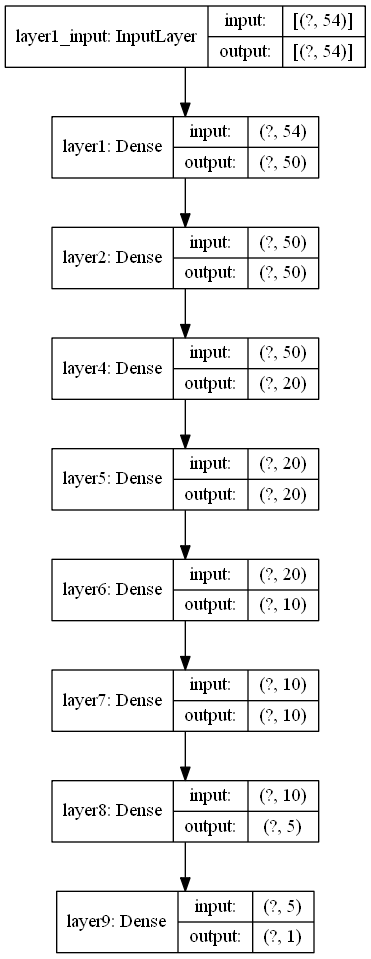

In [227]:
from keras.utils.vis_utils import plot_model
plot_model(model0, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [228]:
model0.fit(x_train, y_train, epochs=500, batch_size=56, validation_data=(x_val, y_val), callbacks= my_callbacks) 

Epoch 1/500
76/76 [==============================] - 0s 4ms/step - loss: 10.7446 - val_loss: 2.3191
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 2.0087 - val_loss: 1.8415
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 1.7083 - val_loss: 1.6868
Epoch 4/500
76/76 [==============================] - 0s 2ms/step - loss: 1.5633 - val_loss: 1.5655
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 1.4474 - val_loss: 1.4444
Epoch 6/500
76/76 [==============================] - 0s 2ms/step - loss: 1.3593 - val_loss: 1.4207
Epoch 7/500
76/76 [==============================] - 0s 2ms/step - loss: 1.2950 - val_loss: 1.3822
Epoch 8/500
76/76 [==============================] - 0s 2ms/step - loss: 1.1946 - val_loss: 1.3082
Epoch 9/500
76/76 [==============================] - 0s 2ms/step - loss: 1.1387 - val_loss: 1.2821
Epoch 10/500
76/76 [==============================] - 0s 1ms/step - loss: 1.0689 - val_loss: 1.2159
Epoch 11

76/76 [==============================] - 0s 2ms/step - loss: 0.5837 - val_loss: 0.9214
Epoch 35/500
76/76 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.8905
Epoch 36/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5475 - val_loss: 0.8841
Epoch 37/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5390 - val_loss: 0.8965
Epoch 38/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5208 - val_loss: 0.8569
Epoch 39/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5281 - val_loss: 0.8980
Epoch 40/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5276 - val_loss: 0.8501
Epoch 41/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5286 - val_loss: 0.8557
Epoch 42/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5085 - val_loss: 0.8694
Epoch 43/500
76/76 [==============================] - 0s 2ms/step - loss: 0.5182 - val_loss: 0.8796
Epoch 44/500


Epoch 68/500
76/76 [==============================] - 0s 2ms/step - loss: 0.4316 - val_loss: 0.8317
Epoch 69/500
52/76 [===================>..........] - ETA: 0s - loss: 0.4428WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
76/76 [==============================] - 0s 3ms/step - loss: 0.4488 - val_loss: 0.8152
Epoch 70/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3766 - val_loss: 0.7535
Epoch 71/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3602 - val_loss: 0.7665
Epoch 72/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3594 - val_loss: 0.7392
Epoch 73/500
76/76 [==============================] - 0s 3ms/step - loss: 0.3557 - val_loss: 0.7463
Epoch 74/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3548 - val_loss: 0.7429
Epoch 75/500
76/76 [==============================] - 0s 2ms/step - loss

76/76 [==============================] - 0s 2ms/step - loss: 0.3216 - val_loss: 0.7385
Epoch 101/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3206 - val_loss: 0.7407
Epoch 102/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3200 - val_loss: 0.7406
Epoch 103/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3197 - val_loss: 0.7447
Epoch 104/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3199 - val_loss: 0.7387
Epoch 105/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3187 - val_loss: 0.7376
Epoch 106/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3195 - val_loss: 0.7400
Epoch 107/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3184 - val_loss: 0.7387
Epoch 108/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3177 - val_loss: 0.7447
Epoch 109/500
76/76 [==============================] - 0s 3ms/step - loss: 0.3177 - val_loss: 0.7402
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3104 - val_loss: 0.7420
Epoch 134/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3104 - val_loss: 0.7410
Epoch 135/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3104 - val_loss: 0.7411
Epoch 136/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3103 - val_loss: 0.7411
Epoch 137/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3103 - val_loss: 0.7422
Epoch 138/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3104 - val_loss: 0.7409
Epoch 139/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3101 - val_loss: 0.7419
Epoch 140/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3099 - val_loss: 0.7410
Epoch 141/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3101 - val_loss: 0.7409
Epoch 142/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3101 - val_loss: 0.7413
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 167/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7419
Epoch 168/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7419
Epoch 169/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7420
Epoch 170/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 171/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 172/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 173/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 174/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7418
Epoch 175/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.7419
Epoc

76/76 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.7417
Epoch 200/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7418
Epoch 201/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7418
Epoch 202/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3087 - val_loss: 0.7418
Epoch 203/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7419
Epoch 204/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.7419
Epoch 205/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7419
Epoch 206/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7418
Epoch 207/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7418
Epoch 208/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3086 - val_loss: 0.7418
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3085 - val_loss: 0.7417
Epoch 233/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3085 - val_loss: 0.7416
Epoch 234/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.7417
Epoch 235/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.7416
Epoch 236/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3084 - val_loss: 0.7416
Epoch 237/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3084 - val_loss: 0.7416
Epoch 238/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.7416
Epoch 239/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.7417
Epoch 240/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3084 - val_loss: 0.7416
Epoch 241/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3084 - val_loss: 0.7416
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3083 - val_loss: 0.7415
Epoch 266/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7415
Epoch 267/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7416
Epoch 268/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3083 - val_loss: 0.7416
Epoch 269/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3082 - val_loss: 0.7416
Epoch 270/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7416
Epoch 271/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7415
Epoch 272/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7416
Epoch 273/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.7416
Epoch 274/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3082 - val_loss: 0.7416
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3080 - val_loss: 0.7417
Epoch 299/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3081 - val_loss: 0.7416
Epoch 300/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3081 - val_loss: 0.7416
Epoch 301/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3080 - val_loss: 0.7417
Epoch 302/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3080 - val_loss: 0.7416
Epoch 303/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3081 - val_loss: 0.7416
Epoch 304/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3080 - val_loss: 0.7416
Epoch 305/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3081 - val_loss: 0.7416
Epoch 306/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3080 - val_loss: 0.7416
Epoch 307/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3080 - val_loss: 0.7416
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7417
Epoch 332/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7418
Epoch 333/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7418
Epoch 334/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7417
Epoch 335/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3079 - val_loss: 0.7417
Epoch 336/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7418
Epoch 337/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7417
Epoch 338/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7417
Epoch 339/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7418
Epoch 340/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3079 - val_loss: 0.7418
Epoc

76/76 [==============================] - 0s 1ms/step - loss: 0.3078 - val_loss: 0.7420
Epoch 365/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3078 - val_loss: 0.7418
Epoch 366/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3078 - val_loss: 0.7418
Epoch 367/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.7419
Epoch 368/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3078 - val_loss: 0.7418
Epoch 369/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.7419
Epoch 370/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3077 - val_loss: 0.7420
Epoch 371/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.7418
Epoch 372/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.7418
Epoch 373/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.7418
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 398/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 399/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 400/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 401/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 402/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7419
Epoch 403/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7417
Epoch 404/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7418
Epoch 405/500
76/76 [==============================] - 0s 1ms/step - loss: 0.3076 - val_loss: 0.7418
Epoch 406/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3076 - val_loss: 0.7418
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoch 431/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7421
Epoch 432/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoch 433/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7421
Epoch 434/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7421
Epoch 435/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoch 436/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoch 437/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7421
Epoch 438/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoch 439/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.7420
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoch 464/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7420
Epoch 465/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7420
Epoch 466/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoch 467/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoch 468/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoch 469/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7420
Epoch 470/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7422
Epoch 471/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoch 472/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7421
Epoc

76/76 [==============================] - 0s 2ms/step - loss: 0.3072 - val_loss: 0.7421
Epoch 497/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.7422
Epoch 498/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.7423
Epoch 499/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.7422
Epoch 500/500
76/76 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.7422


In [229]:
fea_pred = model0.predict(x_train)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_train, fea_pred)
print("Training R-square: {}".format(r2))

fea_pred = model0.predict(x_val)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_val, fea_pred)
print("Validation R-square: {}".format(r2))

fea_pred = model0.predict(x_test)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_test, fea_pred)
print("Testing R-square: {}".format(r2))

Training R-square: 0.9464056906140648
Validation R-square: 0.8678544872766281
Testing R-square: 0.8701713074456028


## retrieve layer and neuron weights

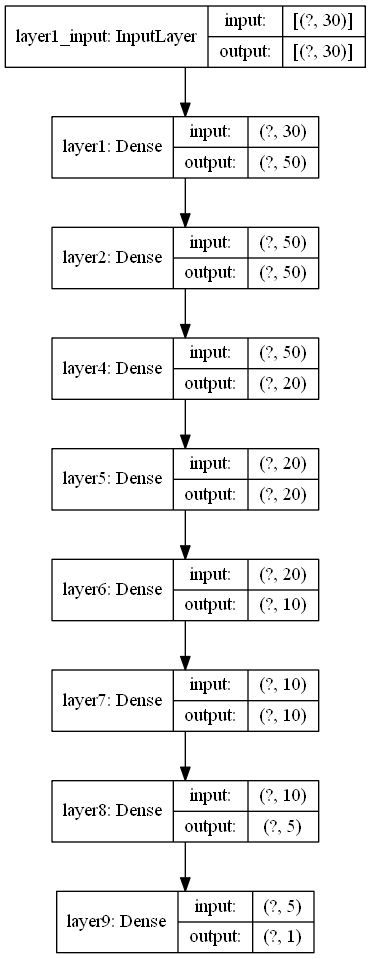

In [25]:
plot_model(model0, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
layer_name = 'layer8'
layer_model = Model(model0.inputs, model0.get_layer(layer_name).output)
layer_y = layer_model.predict(dt_x)
layer_y.shape

(34621, 5)

In [29]:
wts= model0.get_layer('layer9').get_weights()
wts

[array([[ 0.00476721],
        [ 0.5768488 ],
        [ 0.36971483],
        [-0.61876506],
        [-0.79778284]], dtype=float32),
 array([0.5770402], dtype=float32)]

In [1610]:
# tnse_pcs = TSNE(n_components=2, perplexity=2, n_jobs=6, early_exaggeration=3 ,init='pca', learning_rate=2).fit_transform(layer_y)
# pcs2 = pd.DataFrame(tnse_pcs, columns=['P1','P2'])
# pcs2['Stress_class'] = dt3['Stress_class']
# #pcs2['Cluster'] =  clusters_df.iloc[:,ind]

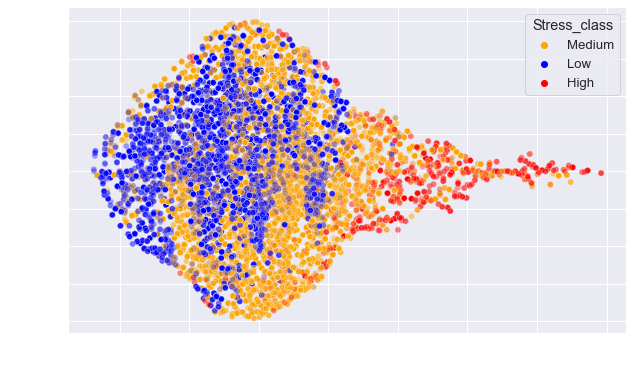

In [1611]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='P1', y='P2', data= pcs2, hue='Stress_class', palette=my_pal, alpha=0.2)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# CNN

## Build up CNN

In [125]:
os.getcwd()

'C:\\Users\\s1052014\\OneDrive - Syngenta\\Desktop\\NA_corn_WO\\Data2021\\Drought Stress\\corn dataset'

In [1047]:
x_train, x_test, y_train, y_test = train_test_split(dt3d, dt_y, random_state=16, shuffle=True, test_size=0.15)       
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=16, test_size=0.25)

print("Train size is: {}".format(x_train.shape[0]))
print("Test size is: {}".format(x_test.shape[0]))
print("Validation size is: {}".format(x_val.shape[0]))

Train size is: 49053
Test size is: 11543
Validation size is: 16352


In [168]:
model = Sequential()
model.add(Conv1D(filters=12, kernel_size=4, strides=1, activation='relu', input_shape=(8,6), name='layer1'))
#model.add(Conv1D(filters=12, kernel_size=3, strides=1, activation='relu', input_shape=(8,6),name='layer2'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=8, kernel_size=2, strides=1, activation='relu', name='layer3'))


model.add(Conv1D(filters=8, kernel_size=1, strides=1, activation='relu', name='layer4'))
model.add(Conv1D(filters=8, kernel_size=1, strides=1, activation='relu', name='layer5'))

#model.add(AveragePooling1D(pool_size=2, name='layer6'))
model.add(Flatten(name='layer7'))
#model.add(Dense(15, activation='relu', name='layer8'))
model.add(Dense(15, activation='relu', name='layer9'))
model.add(Dense(2, activation='relu', name='layer10'))
model.add(Dense(1))

model.compile(optimizer= keras.optimizers.Adam(lr=0.001), loss='mse')

my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),
    tf.keras.callbacks.ModelCheckpoint(filepath='./models/CNN_1D/model_best.h5', save_best_only=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, verbose=1, epsilon=1e-4, min_lr = 0.000001, mode='auto')   
]

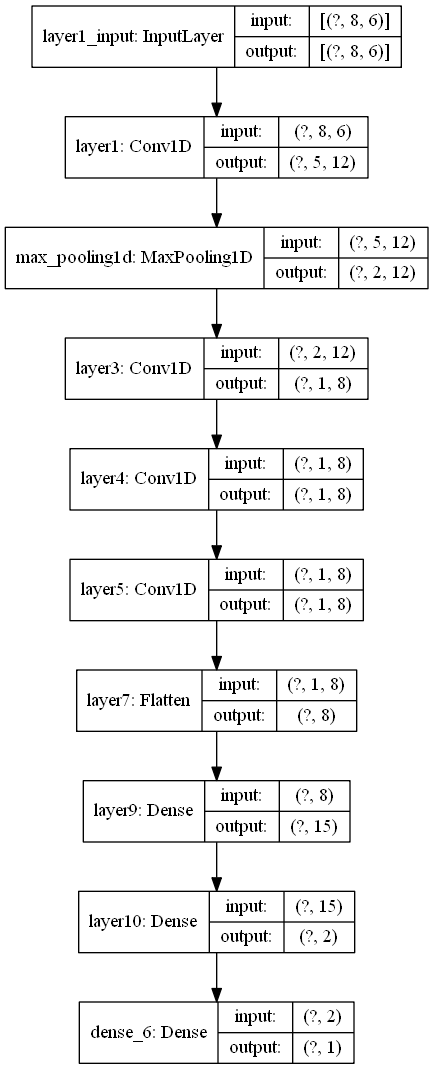

In [169]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(dt3d, dt_y, random_state=16, shuffle=True, test_size=0.15)       
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=16, test_size=0.25)

print("Train size is: {}".format(x_train.shape[0]))
print("Test size is: {}".format(x_test.shape[0]))
print("Validation size is: {}".format(x_val.shape[0]))

Train size is: 22070
Test size is: 5194
Validation size is: 7357


### Model training 

In [171]:
model.fit(x_train, y_train, epochs=500, batch_size=56, validation_data=(x_val, y_val), callbacks= my_callbacks) 

Epoch 1/500
395/395 [==============================] - 2s 5ms/step - loss: 11.8673 - val_loss: 3.2324
Epoch 2/500
395/395 [==============================] - 1s 3ms/step - loss: 3.1313 - val_loss: 2.8087
Epoch 3/500
395/395 [==============================] - 1s 3ms/step - loss: 2.7436 - val_loss: 2.5950
Epoch 4/500
395/395 [==============================] - 2s 5ms/step - loss: 2.4620 - val_loss: 2.3664
Epoch 5/500
395/395 [==============================] - 1s 3ms/step - loss: 2.3029 - val_loss: 2.2588
Epoch 6/500
395/395 [==============================] - 1s 3ms/step - loss: 2.2328 - val_loss: 2.1980
Epoch 7/500
395/395 [==============================] - 1s 3ms/step - loss: 2.1683 - val_loss: 2.0614
Epoch 8/500
395/395 [==============================] - 2s 4ms/step - loss: 2.1219 - val_loss: 2.0465
Epoch 9/500
395/395 [==============================] - 2s 4ms/step - loss: 2.0768 - val_loss: 2.0333
Epoch 10/500
395/395 [==============================] - 2s 4ms/step - loss: 2.0626 - val_l

Epoch 66/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3781 - val_loss: 1.3906
Epoch 67/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3767 - val_loss: 1.4331
Epoch 68/500
395/395 [==============================] - 1s 3ms/step - loss: 1.4001 - val_loss: 1.3395
Epoch 69/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3777 - val_loss: 1.3461
Epoch 70/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3688 - val_loss: 1.3619
Epoch 71/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3589 - val_loss: 1.3669
Epoch 72/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3577 - val_loss: 1.3210
Epoch 73/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3590 - val_loss: 1.3720
Epoch 74/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3453 - val_loss: 1.4478
Epoch 75/500
395/395 [==============================] - 1s 3ms/step - loss: 1.3746

Epoch 99/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2846 - val_loss: 1.2311
Epoch 100/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2761 - val_loss: 1.2749
Epoch 101/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2849 - val_loss: 1.2556
Epoch 102/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2722 - val_loss: 1.2486
Epoch 103/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2640 - val_loss: 1.2209
Epoch 104/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2631 - val_loss: 1.2675
Epoch 105/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2637 - val_loss: 1.2087
Epoch 106/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2500 - val_loss: 1.2367
Epoch 107/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2591 - val_loss: 1.2781
Epoch 108/500
395/395 [==============================] - 1s 4ms/step - los

395/395 [==============================] - 1s 3ms/step - loss: 1.2139 - val_loss: 1.2935
Epoch 132/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2250 - val_loss: 1.1738
Epoch 133/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2171 - val_loss: 1.2123
Epoch 134/500
395/395 [==============================] - 2s 4ms/step - loss: 1.2153 - val_loss: 1.2739
Epoch 135/500
395/395 [==============================] - 1s 4ms/step - loss: 1.2197 - val_loss: 1.2051
Epoch 136/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2160 - val_loss: 1.1802
Epoch 137/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2083 - val_loss: 1.1777
Epoch 138/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2107 - val_loss: 1.1848
Epoch 139/500
395/395 [==============================] - 1s 3ms/step - loss: 1.2052 - val_loss: 1.4009
Epoch 140/500
395/395 [==============================] - 1s 4ms/step - loss: 1.2035 - v

Epoch 197/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1472 - val_loss: 1.1571
Epoch 198/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1530 - val_loss: 1.2158
Epoch 199/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1369 - val_loss: 1.1303
Epoch 200/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1440 - val_loss: 1.1452
Epoch 201/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1396 - val_loss: 1.1394
Epoch 202/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1356 - val_loss: 1.1388
Epoch 203/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1424 - val_loss: 1.0995
Epoch 204/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1421 - val_loss: 1.1145
Epoch 205/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1325 - val_loss: 1.1661
Epoch 206/500
395/395 [==============================] - 1s 3ms/step - lo

395/395 [==============================] - 1s 3ms/step - loss: 1.1087 - val_loss: 1.0885
Epoch 230/500
395/395 [==============================] - 1s 3ms/step - loss: 1.1359 - val_loss: 1.1095
Epoch 231/500
392/395 [============================>.] - ETA: 0s - loss: 1.1130WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.

Epoch 00231: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
395/395 [==============================] - 1s 3ms/step - loss: 1.1137 - val_loss: 1.1099
Epoch 232/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0549 - val_loss: 1.0591
Epoch 233/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0541 - val_loss: 1.0768
Epoch 234/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0492 - val_loss: 1.0597
Epoch 235/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0518 - val_loss: 1.0611
Epoch 236/500
395/395 [==============================] - 1s 3ms

Epoch 262/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0412 - val_loss: 1.0500
Epoch 263/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0380 - val_loss: 1.0557
Epoch 264/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0415 - val_loss: 1.1018
Epoch 265/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0375 - val_loss: 1.0719
Epoch 266/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0404 - val_loss: 1.0572
Epoch 267/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0386 - val_loss: 1.0482
Epoch 268/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0355 - val_loss: 1.0624
Epoch 269/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0360 - val_loss: 1.0814
Epoch 270/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0366 - val_loss: 1.0707
Epoch 271/500
395/395 [==============================] - 1s 2ms/step - lo

395/395 [==============================] - 1s 3ms/step - loss: 1.0269 - val_loss: 1.0655
Epoch 295/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0272 - val_loss: 1.0658
Epoch 296/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0301 - val_loss: 1.0827
Epoch 297/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0285 - val_loss: 1.0704
Epoch 298/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0326 - val_loss: 1.0507
Epoch 299/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0276 - val_loss: 1.0641
Epoch 300/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0278 - val_loss: 1.0765
Epoch 301/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0271 - val_loss: 1.0477
Epoch 302/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0273 - val_loss: 1.0440
Epoch 303/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0261 - v

Epoch 360/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0190 - val_loss: 1.0562
Epoch 361/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0151 - val_loss: 1.0416
Epoch 362/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0154 - val_loss: 1.0373
Epoch 363/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0129 - val_loss: 1.0679
Epoch 364/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0111 - val_loss: 1.0677
Epoch 365/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0140 - val_loss: 1.0481
Epoch 366/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0133 - val_loss: 1.0343
Epoch 367/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0096 - val_loss: 1.0466
Epoch 368/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0076 - val_loss: 1.0666
Epoch 369/500
395/395 [==============================] - 1s 3ms/step - lo

395/395 [==============================] - 1s 2ms/step - loss: 1.0038 - val_loss: 1.0905
Epoch 393/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0142 - val_loss: 1.0548
Epoch 394/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0002 - val_loss: 1.0371
Epoch 395/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0008 - val_loss: 1.0228
Epoch 396/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0017 - val_loss: 1.0261
Epoch 397/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0032 - val_loss: 1.0358
Epoch 398/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0030 - val_loss: 1.0321
Epoch 399/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0004 - val_loss: 1.0386
Epoch 400/500
395/395 [==============================] - 1s 2ms/step - loss: 1.0028 - val_loss: 1.0223
Epoch 401/500
395/395 [==============================] - 1s 3ms/step - loss: 1.0023 - v

395/395 [==============================] - 1s 3ms/step - loss: 0.9768 - val_loss: 1.0157
Epoch 458/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9766 - val_loss: 1.0139
Epoch 459/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9766 - val_loss: 1.0183
Epoch 460/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9764 - val_loss: 1.0149
Epoch 461/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9766 - val_loss: 1.0159
Epoch 462/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9763 - val_loss: 1.0161
Epoch 463/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9761 - val_loss: 1.0149
Epoch 464/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9763 - val_loss: 1.0165
Epoch 465/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9759 - val_loss: 1.0148
Epoch 466/500
395/395 [==============================] - 1s 3ms/step - loss: 0.9757 - v

## Evaluation

### Final model

In [172]:
print("Testing mse: {}".format(model.evaluate(x_test, y_test)))
print("Training mse: {}".format(model.evaluate(x_train, y_train)))
print("Validation mse: {}".format(model.evaluate(x_val, y_val)))

163/163 [==============================] - 0s 990us/step - loss: 1.0778
Testing mse: 1.077761173248291
690/690 [==============================] - 1s 1ms/step - loss: 0.9743
Training mse: 0.9743260145187378
230/230 [==============================] - 0s 1ms/step - loss: 1.0180
Validation mse: 1.0179579257965088


In [173]:
fea_pred = model.predict(x_train)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_train, fea_pred)
print("Training R-square: {}".format(r2))

fea_pred = model.predict(x_val)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_val, fea_pred)
print("Validation R-square: {}".format(r2))

fea_pred = model.predict(x_test)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_test, fea_pred)
print("Testing R-square: {}".format(r2))

Training R-square: 0.8156956425057955
Validation R-square: 0.8036197217155373
Testing R-square: 0.7877350451206954


### Best model 

In [206]:
# trained_model = './model.440.h5'
# model = tf.keras.models.load_model(trained_model)

In [ ]:
# print("Testing mse: {}".format(model.evaluate(x_test, y_test)))
# print("Training mse: {}".format(model.evaluate(x_train, y_train)))
# print("Validation mse: {}".format(model.evaluate(x_val, y_val)))

# fea_pred = model.predict(x_train)
# fea_pred = fea_pred.ravel()
# r2= sklearn.metrics.r2_score(y_train, fea_pred)
# print("Training R-square: {}".format(r2))

# fea_pred = model.predict(x_val)
# fea_pred = fea_pred.ravel()
# r2= sklearn.metrics.r2_score(y_val, fea_pred)
# print("Validation R-square: {}".format(r2))

# fea_pred = model.predict(x_test)
# fea_pred = fea_pred.ravel()
# r2= sklearn.metrics.r2_score(y_test, fea_pred)
# print("Testing R-square: {}".format(r2))

## Retrieve and visualize layers 

In [174]:
from keras.models import Model

model = model
layer_name = 'layer10'
layer_model = Model(model.inputs, model.get_layer(layer_name).output)

In [175]:
layer_y = layer_model.predict(dt3d)
layer_y.shape

(34621, 2)

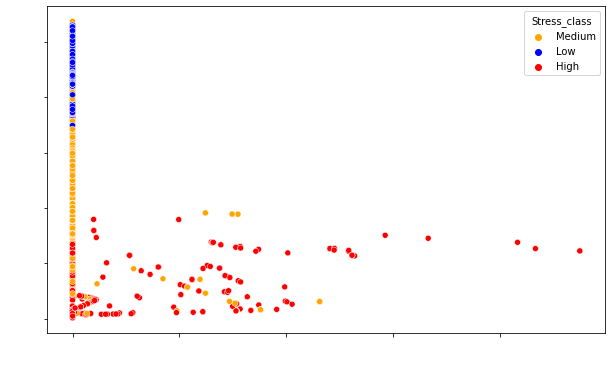

In [176]:
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}
pc_df = pd.DataFrame(layer_y, columns=['P1','P2'])
pc_df['Stress_class'] = dt3['Stress_class']
plt.figure(figsize=(10,6))
sns.scatterplot(x='P1', y='P2', data=pc_df, hue='Stress_class', palette=my_pal)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# RNN LSTM

In [32]:
x_train, x_test, y_train, y_test = train_test_split(dt3d, dt_y, random_state=16, shuffle=True, test_size=0.15)       
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=16, test_size=0.25)

print("Train size is: {}".format(x_train.shape[0]))
print("Test size is: {}".format(x_test.shape[0]))
print("Validation size is: {}".format(x_val.shape[0]))

Train size is: 49053
Test size is: 11543
Validation size is: 16352


## Build up model 

In [35]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences = True, input_shape=(8, 7), name='layer1'))

model2.add(LSTM(units = 50, return_sequences = True, name='layer2'))
model2.add(LSTM(units = 20, return_sequences = True, name='layer2b'))
model2.add(LSTM(units = 20, return_sequences = True, name='layer2c'))

model2.add(LSTM(units = 10, return_sequences = True, name='layer3'))

model2.add(LSTM(units = 10, return_sequences = True, name='layer4'))



model2.add(Flatten(name='layer5'))

model2.add(Dense(20, name='layer6'))
model2.add(Dense(10, name='layer7'))
model2.add(Dense(1, name='layer8'))
model2.compile(optimizer= keras.optimizers.Adam(lr=0.001), loss='mse')

my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),
    tf.keras.callbacks.ModelCheckpoint(filepath='./models/CNN_1D/model_best.h5', save_best_only=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, verbose=1, epsilon=1e-4, min_lr = 0.000001, mode='auto')   
]

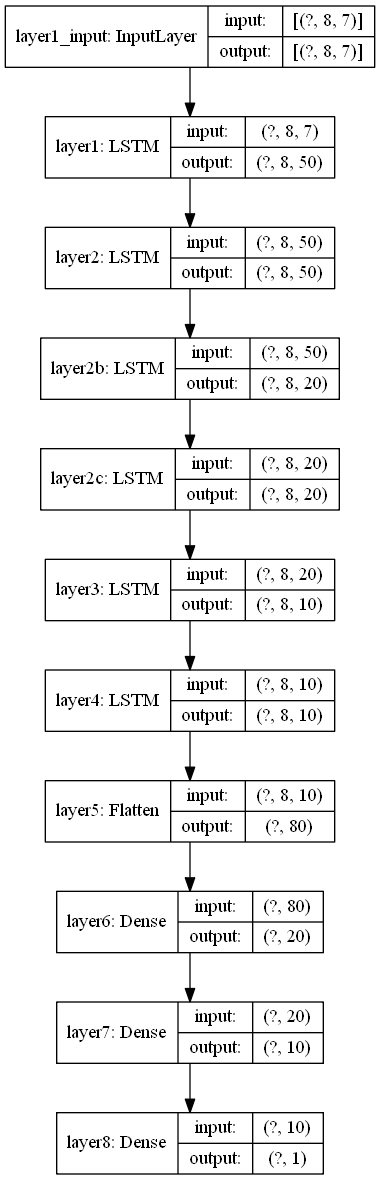

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Model training 

In [37]:
model2.fit(x_train, y_train, epochs=500, batch_size=56, validation_data=(x_val, y_val), shuffle=False, callbacks= my_callbacks)

Epoch 1/500
876/876 [==============================] - 36s 41ms/step - loss: 5.6075 - val_loss: 3.1608
Epoch 2/500
876/876 [==============================] - 31s 36ms/step - loss: 2.3727 - val_loss: 2.3877
Epoch 3/500
876/876 [==============================] - 31s 35ms/step - loss: 1.9442 - val_loss: 2.1236
Epoch 4/500
876/876 [==============================] - 32s 37ms/step - loss: 1.7968 - val_loss: 1.9446
Epoch 5/500
876/876 [==============================] - 31s 35ms/step - loss: 1.6523 - val_loss: 1.6521
Epoch 6/500
876/876 [==============================] - 31s 35ms/step - loss: 1.5324 - val_loss: 1.4778
Epoch 7/500
876/876 [==============================] - 32s 37ms/step - loss: 1.4358 - val_loss: 1.3068
Epoch 8/500
876/876 [==============================] - 32s 36ms/step - loss: 1.3376 - val_loss: 1.2780
Epoch 9/500
876/876 [==============================] - 31s 36ms/step - loss: 1.2505 - val_loss: 1.1564
Epoch 10/500
876/876 [==============================] - 31s 36ms/step - l

876/876 [==============================] - 32s 37ms/step - loss: 0.6633 - val_loss: 0.7085
Epoch 67/500
876/876 [==============================] - 31s 35ms/step - loss: 0.6604 - val_loss: 0.7060
Epoch 68/500
876/876 [==============================] - 33s 38ms/step - loss: 0.6674 - val_loss: 0.6799
Epoch 69/500
876/876 [==============================] - 33s 38ms/step - loss: 0.6539 - val_loss: 0.6932
Epoch 70/500
876/876 [==============================] - 33s 38ms/step - loss: 0.6534 - val_loss: 0.7093
Epoch 71/500
876/876 [==============================] - 33s 37ms/step - loss: 0.6513 - val_loss: 0.6900
Epoch 72/500
876/876 [==============================] - 34s 39ms/step - loss: 0.6540 - val_loss: 0.7007
Epoch 73/500
876/876 [==============================] - 33s 38ms/step - loss: 0.6558 - val_loss: 0.6939
Epoch 74/500
876/876 [==============================] - 31s 35ms/step - loss: 0.6472 - val_loss: 0.6949
Epoch 75/500
876/876 [==============================] - 31s 35ms/step - loss:

Epoch 99/500
876/876 [==============================] - 18s 20ms/step - loss: 0.6227 - val_loss: 0.6678
Epoch 100/500
876/876 [==============================] - 16s 19ms/step - loss: 0.6294 - val_loss: 0.6668
Epoch 101/500
876/876 [==============================] - 16s 18ms/step - loss: 0.6250 - val_loss: 0.6797
Epoch 102/500
876/876 [==============================] - 19s 21ms/step - loss: 0.6205 - val_loss: 0.6643
Epoch 103/500
876/876 [==============================] - 19s 21ms/step - loss: 0.6190 - val_loss: 0.6593
Epoch 104/500
876/876 [==============================] - 16s 18ms/step - loss: 0.6192 - val_loss: 0.6674
Epoch 105/500
876/876 [==============================] - 15s 18ms/step - loss: 0.6129 - val_loss: 0.6908
Epoch 106/500
876/876 [==============================] - 15s 18ms/step - loss: 0.6296 - val_loss: 0.6734
Epoch 107/500
876/876 [==============================] - 15s 18ms/step - loss: 0.6144 - val_loss: 0.6623
Epoch 108/500
876/876 [==============================] -

Epoch 163/500
876/876 [==============================] - 15s 17ms/step - loss: 0.5352 - val_loss: 0.6347
Epoch 164/500
876/876 [==============================] - 15s 18ms/step - loss: 0.5348 - val_loss: 0.6347
Epoch 165/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5344 - val_loss: 0.6346
Epoch 166/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5341 - val_loss: 0.6346
Epoch 167/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5337 - val_loss: 0.6346
Epoch 168/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5334 - val_loss: 0.6345
Epoch 169/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5331 - val_loss: 0.6345
Epoch 170/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5328 - val_loss: 0.6345
Epoch 171/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5324 - val_loss: 0.6344
Epoch 172/500
876/876 [==============================] 

Epoch 227/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5222 - val_loss: 0.6289
Epoch 228/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5221 - val_loss: 0.6289
Epoch 229/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5220 - val_loss: 0.6289
Epoch 230/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5220 - val_loss: 0.6289
Epoch 231/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5219 - val_loss: 0.6289
Epoch 232/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5219 - val_loss: 0.6289
Epoch 233/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5218 - val_loss: 0.6289
Epoch 234/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5218 - val_loss: 0.6289
Epoch 235/500
876/876 [==============================] - 15s 18ms/step - loss: 0.5217 - val_loss: 0.6289
Epoch 236/500
876/876 [==============================] 

Epoch 291/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5195 - val_loss: 0.6276
Epoch 292/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5195 - val_loss: 0.6276
Epoch 293/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5195 - val_loss: 0.6276
Epoch 294/500
875/876 [============================>.] - ETA: 0s - loss: 0.5197WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.

Epoch 00294: ReduceLROnPlateau reducing learning rate to 1e-06.
876/876 [==============================] - 16s 19ms/step - loss: 0.5195 - val_loss: 0.6276
Epoch 295/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5194 - val_loss: 0.6276
Epoch 296/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5194 - val_loss: 0.6276
Epoch 297/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5194 - val_loss: 0.6276
Epoch 298/500
876/876 [=============================

Epoch 323/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 324/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 325/500
876/876 [==============================] - 15s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 326/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 327/500
876/876 [==============================] - 15s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 328/500
876/876 [==============================] - 15s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 329/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 330/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 331/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5192 - val_loss: 0.6276
Epoch 332/500
876/876 [==============================] 

876/876 [==============================] - 15s 18ms/step - loss: 0.5189 - val_loss: 0.6276
Epoch 388/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5189 - val_loss: 0.6276
Epoch 389/500
876/876 [==============================] - 15s 17ms/step - loss: 0.5189 - val_loss: 0.6276
Epoch 390/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 391/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 392/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 393/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 394/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 395/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5188 - val_loss: 0.6276
Epoch 396/500
876/876 [==============================] - 17s 20ms/ste

Epoch 419/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 420/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 421/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 422/500
876/876 [==============================] - 17s 20ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 423/500
876/876 [==============================] - 16s 19ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 424/500
876/876 [==============================] - 16s 18ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 425/500
876/876 [==============================] - 17s 19ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 426/500
876/876 [==============================] - 18s 21ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 427/500
876/876 [==============================] - 18s 20ms/step - loss: 0.5187 - val_loss: 0.6276
Epoch 428/500
876/876 [==============================] 

876/876 [==============================] - 31s 35ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 484/500
876/876 [==============================] - 31s 36ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 485/500
876/876 [==============================] - 31s 36ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 486/500
876/876 [==============================] - 31s 35ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 487/500
876/876 [==============================] - 32s 36ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 488/500
876/876 [==============================] - 32s 36ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 489/500
876/876 [==============================] - 31s 35ms/step - loss: 0.5184 - val_loss: 0.6276
Epoch 490/500
876/876 [==============================] - 31s 35ms/step - loss: 0.5183 - val_loss: 0.6276
Epoch 491/500
876/876 [==============================] - 32s 36ms/step - loss: 0.5183 - val_loss: 0.6276
Epoch 492/500
876/876 [==============================] - 32s 36ms/ste

## Model evaluation 

In [38]:
print("Testing mse: {}".format(model2.evaluate(x_test, y_test)))
print("Training mse: {}".format(model2.evaluate(x_train, y_train)))
print("Validation mse: {}".format(model2.evaluate(x_val, y_val)))

361/361 [==============================] - 3s 9ms/step - loss: 0.6159
Testing mse: 0.6159436106681824
1533/1533 [==============================] - 15s 10ms/step - loss: 0.5181
Training mse: 0.5180846452713013
511/511 [==============================] - 5s 9ms/step - loss: 0.6276
Validation mse: 0.627568781375885


In [39]:
fea_pred = model2.predict(x_train)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_train, fea_pred)
print("Training R-square: {}".format(r2))

fea_pred = model2.predict(x_val)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_val, fea_pred)
print("Validation R-square: {}".format(r2))

fea_pred = model2.predict(x_test)
fea_pred = fea_pred.ravel()
r2= sklearn.metrics.r2_score(y_test, fea_pred)
print("Testing R-square: {}".format(r2))

Training R-square: 0.9000160680294332
Validation R-square: 0.8777738506844132
Testing R-square: 0.8803497373860947


### Save model 

In [40]:
model2.save('./models/RNN/model_gap.h5')

## Retrieve and visualize layers

In [41]:
from keras.models import Model

model = model2
layer_model = Model(model.inputs, model.get_layer('layer7').output)

layer_y = layer_model.predict(dt3d)
layer_y.shape

(76948, 10)

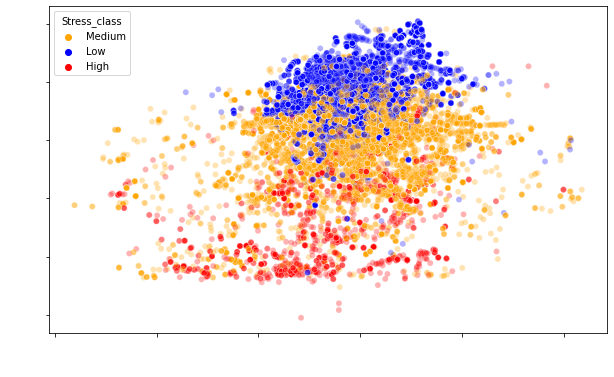

In [114]:
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}
pc_df = pd.DataFrame(layer_y, columns=['P1','P2'])
pc_df['Stress_class'] = dt3['Stress_class']
plt.figure(figsize=(10,6))
sns.scatterplot(x='P1', y='P2', data=pc_df, hue='Stress_class', palette=my_pal, alpha=0.3)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Conduct  T-sne on Deep Learning features 

## Retrive layers and get DL features 

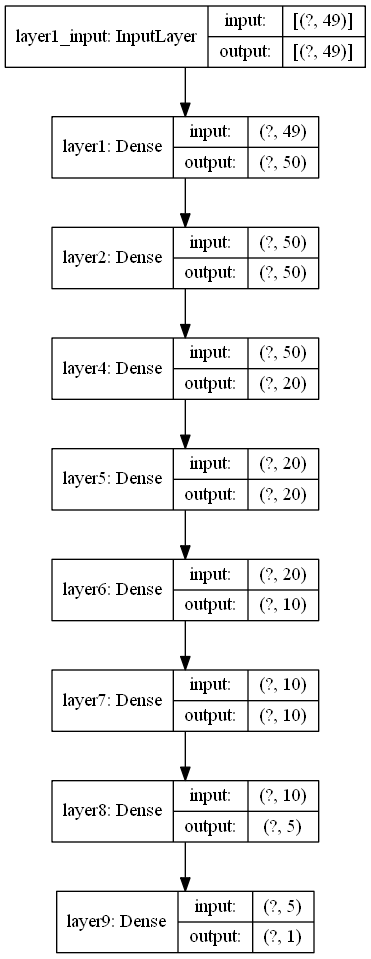

In [1080]:
plot_model(model0, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [1083]:
model = model0
layer_model = Model(model.inputs, model.get_layer('layer8').output)

layer_y = layer_model.predict(dt3c)
layer_y.shape

(76948, 5)

## Conduct t-sne and visualize results

In [13]:
dt_re = pd.read_csv('Deep_features_stress_characterization_NA_East_market.csv')

dt_re2 = pd.merge(dt2, dt_re,  on=['trial_id'], how='left')
print(dt3c.shape)

dt_re2.index = dt3c.index

print(dt_re2.shape)
dt_re2.columns

(76948, 56)
(76948, 57)


Index(['trial_id', 'wsy_c_x', 'WaterDeficit30DBP.Planting',
       'WaterDeficitPlanting.VE', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT',
       'WaterDeficitVT.R2', 'WaterDeficitR2.R4', 'WaterDeficitR4.R6',
       'WaterDeficitR6.Harvest', 'Heat30DBP.Planting', 'HeatPlanting.VE',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficit30DBP.Planting',
       'VaporPressureDeficitPlanting.VE', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sum30DBP.Planting',
       'et0sumPlanting.VE', 'et0sumVE.V6', 'et0sumV6.VT', 'et0sumVT.R2',
       'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest', 'rhavg30DBP.Planting',
       'rhavgPlanting.VE', 'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2',
       'rhavgR2.R4', 'rhavgR4.R6', 'rhavgR6.Harvest', 'year',
       'GrainYieldPotential', 'HPR3

In [14]:
dt3c.columns

RangeIndex(start=0, stop=56, step=1)

In [16]:
from sklearn.manifold import TSNE

In [21]:
x_sp, x_other, y_sp, y_other  =  train_test_split(dt3c, dt_re2[['Stress']], random_state=16, shuffle=True, test_size=0.75)     

In [24]:
tnse_pcs = TSNE(n_components=2, perplexity=10, n_jobs= 6, n_iter= 5000, init='pca').fit_transform(x_sp)     
pcs2 = pd.DataFrame(tnse_pcs, columns=['P1','P2'])

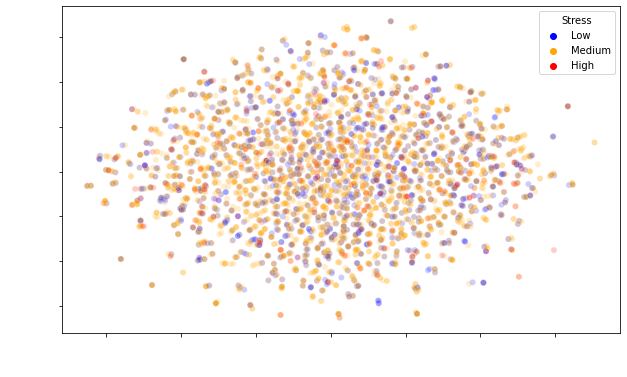

In [25]:
#pcs2['Cluster'] =  clusters_df.iloc[:,ind]
pcs2['Stress'] = y_sp
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}

plt.figure(figsize=(10,6))
sns.scatterplot(x='P1', y='P2', data= pcs2, hue='Stress', palette=my_pal, alpha=0.2)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Clustering  and visualize clusters

## Retrieve prediction 

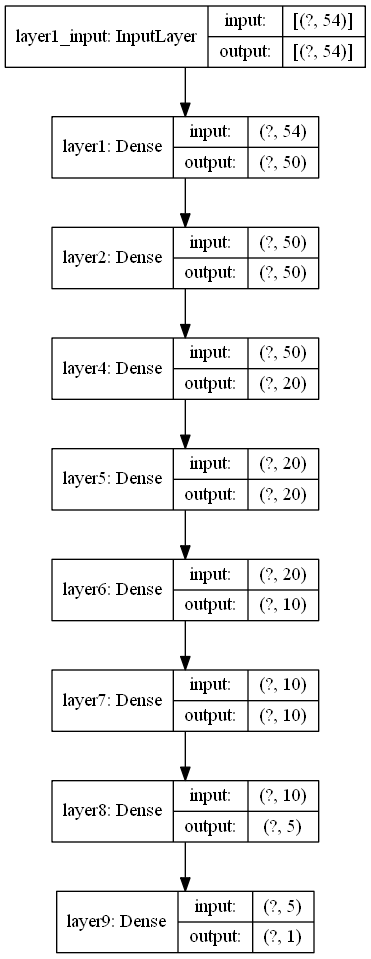

In [230]:
plot_model(model0, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [265]:
from keras.models import Model

model = model0
layer_model = Model(model.inputs, model.get_layer('layer8').output)

layer_y = layer_model.predict(dt_x)
print(layer_y.shape)

wts= model0.get_layer('layer9').get_weights()

layer_y = layer_y * wts[0].T

layer_y.shape

(6248, 5)


(6248, 5)

## Clustering 

In [364]:
clusters_df = pd.DataFrame()
sses_df = pd.DataFrame()
sse_ls= []
for rp in range(50):
    
    kmns = KMeans(n_clusters=15, n_init=10, max_iter=500, init='k-means++')
    kmns.fit(layer_y)
    
    lb = kmns.labels_
    lb_df = pd.DataFrame(lb)
    clusters_df = pd.concat([clusters_df, lb_df], axis=1)
    
    sses = kmns.inertia_
    sse_ls.append(sses)

In [365]:
sse_df = pd.DataFrame(sse_ls)
print(sse_df[0].min())
print(sse_df[0].argmin(axis=0))
print(sse_df.describe())

ind = sse_df[0].argmin(axis=0)
ind

326.7413330078125
1
                0
count   50.000000
mean   327.693871
std      1.804623
min    326.741333
25%    326.794159
50%    326.839844
75%    326.919472
max    332.923096


1

### Supervised deep features 

#### Classify stress levels 

In [432]:
dfs = dt3.copy()
dfs.index = clusters_df.index
dfs['Cluster'] =  clusters_df.iloc[:,ind]
#dfs['Cluster'] =  y_pred
#print(dfs['Cluster'].value_counts())
cluster_md = dfs[['Cluster', 'Percent_yield_gap','ISF']].groupby(['Cluster']).median()
cluster_md.head(2)

cluster_md = cluster_md.reset_index()
cluster_md['Stress'] = 'Medium'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap<20] = 'Low'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap<10.5] = 'Very_Low'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap>40] = 'High'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap>= 49.5] = 'Very_high'

# cluster_md['Stress'].loc[cluster_md.Percent_yield_gap>=49.5] = 'High'
# cluster_md['Stress'].loc[cluster_md.Percent_yield_gap<29.5] = 'Low'
cluster_md.sort_values(['ISF'])

,Cluster,Percent_yield_gap,ISF,Stress
11,11,73.151642,0.376418,Very_high
9,9,57.744782,0.470853,Very_high
4,4,64.446211,0.497967,Very_high
2,2,49.795341,0.570870,Very_high
13,13,43.025354,0.577210,High
8,8,46.702106,0.581481,High
5,5,34.812192,0.607405,Medium
6,6,36.834273,0.614418,Medium
1,1,29.535743,0.639236,Medium
10,10,25.136730,0.669980,Medium


In [434]:
print(dfs[['Stress', 'Percent_yield_gap','ISF']].groupby(['Stress']).agg({
    'count','median'}))   

          Percent_yield_gap             ISF      
                     median count    median count
Stress                                           
High              44.951009   482  0.581253   482
Low               17.032632   648  0.751511   648
Medium            27.861468  4355  0.679131  4355
Very_Low          10.166160   262  0.749723   262
Very_high         55.468011   501  0.519212   501


In [435]:
dt= pd.read_csv('Environment_7stages_NA_corn.csv')
dt = dt.loc[dt.year>2015]
dt = dt.loc[dt.Market_segment=='West']

In [437]:
dt_a2 = pd.merge(dfs, dt, on=dt2.columns.to_list())
print(dt_a2.shape)

print(dt_a2.groupby(['Stress','wsy_c']).size())
dt_a2.groupby(['Stress']).size()

(29170, 110)
Stress     wsy_c
High       DRY        386
           IRR        651
           LIRR       148
           NONE         7
           RAIN       376
           TILE         3
Low        DRY        269
           IRR       1132
           NONE       330
           RAIN        88
           TILE       889
Medium     DRY       1436
           IRR      11130
           LIRR       158
           NONE      6615
           RAIN      1212
           TILE      1944
Very_Low   DRY          6
           IRR        351
           LIRR         4
           NONE       210
           RAIN         3
           TILE       553
Very_high  DRY        175
           IRR        545
           LIRR       396
           NONE        18
           RAIN       134
           TILE         1
dtype: int64


Stress
High          1571
Low           2708
Medium       22495
Very_Low      1127
Very_high     1269
dtype: int64

In [438]:
ts = dt_a2[['trial_id','year','wsy_c','Stress','ISF']]
ts.head(5)

,trial_id,year,wsy_c,Stress,ISF
0,16SUTPYG2NS7201,2016,IRR,Medium,0.381555
1,16SUTPYG2NT7201,2016,IRR,Medium,0.381555
2,16SULTYG27C7201,2016,IRR,Medium,0.381555
3,16SUTPYG2PD7201,2016,IRR,Medium,0.381555
4,16SUTPYG2PF7201,2016,IRR,Medium,0.381555


In [439]:
ts.to_csv('NA_corn_stress_west_1620.csv',index=False)

In [328]:
dfs2.rename(columns={'Stress_y':'stress_old', 'Stress_x':'stress_new'}, inplace=True)
n_a = n_a2= dfs2.copy()

In [886]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='P1', y='P2', data=pcs2, hue= dfs['Stress'], alpha=0.5)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

NameError: name 'pcs2' is not defined

<Figure size 720x432 with 0 Axes>

#### Write results 

In [1000]:
results = dfs[['trial_id','Stress','wsy_c']]
results.to_csv('Deep_features_stress_characterization_NA_East_market.csv', index=False)

In [580]:
results = dfs[['trial_id','Stress']]
results.to_csv('Deep_features_stress_NA_west_market_irr.csv', index=False)

In [430]:
results = dfs[['trial_id','wsy_c','Stress']]
results.to_csv('Deep_features_stress_characterization__NA_west_market.csv', index=False)

In [788]:
irr = pd.read_csv('Deep_features_stress_NA_west_market_irr.csv')
lirr = pd.read_csv('Deep_features_stress_NA_west_market_lirr.csv')

print(irr.shape)
print(lirr.shape)

dta2 = pd.read_csv('Deep_features_stress_characterization__NA_west_market.csv')
print(dta2.head(3))

(31343, 2)
(34621, 2)
(65964, 2)
          trial_id  Stress
0  09SUABYG6615207     Low
1  09SUABYG6615C01     Low
2  09SUABYG6616201  Medium
          trial_id wsy_c  Stress
0  09SUABYG6615207   IRR     Low
1  09SUABYG6615C01   IRR     Low
2  09SUABYG6615C02  LIRR  Medium


In [789]:
irr['wsy_c'] = 'IRR'
lirr['wsy_c'] = 'LIRR'
dta = pd.concat([irr,lirr], axis=0)
print(dta.shape)
print(dta.head(3))

(65964, 3)
          trial_id  Stress wsy_c
0  09SUABYG6615207     Low   IRR
1  09SUABYG6615C01     Low   IRR
2  09SUABYG6616201  Medium   IRR


In [791]:
dta.to_csv('Deep_features_stress_characterization_NA_west_market_V3.csv', index=False)
dta.head(2)

,trial_id,Stress,wsy_c
0,09SUABYG6615207,Low,IRR
1,09SUABYG6615C01,Low,IRR


In [637]:
dt_cp = pd.merge(dta[['trial_id','Stress']], dta2[['trial_id','Stress']], on=['trial_id'])
dt_cp.head(2)

,trial_id,Stress_x,Stress_y
0,09SUABYG6615207,Low,Low
1,09SUABYG6615C01,Low,Low


In [632]:
dt_cp.groupby(['Stress_x', 'Stress_y']).size()

Stress_x  Stress_y
High      High         1929
          Low            13
          Medium       1455
Low       High            2
          Low         28129
          Medium       2136
Medium    High           82
          Low          7910
          Medium      24308
dtype: int64

In [633]:
(1929 + 28129 + 24308)/dta.shape[0]

0.8241768237220302

### Autoencoder

In [1801]:
cluster_md = data_all[['Cluster', 'Stress_class','ygsmn','Percent_yield_gap']].groupby(['Cluster']).median()
cluster_md.head(2)

cluster_md = cluster_md.reset_index()
cluster_md['Stress'] = 'Medium'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap>=50] = 'High'
cluster_md['Stress'].loc[cluster_md.Percent_yield_gap<30] = 'Low'
cluster_md

,Cluster,ygsmn,Percent_yield_gap,Stress
0,0,125.786071,28.839747,Low
1,1,120.970134,33.523764,Medium
2,2,112.302452,28.194944,Low
3,3,87.389000,48.251636,Medium
4,4,56.406794,69.984082,High
5,5,120.156939,30.818519,Medium
6,6,84.698193,56.265399,High
7,7,113.931437,35.145201,Medium
8,8,119.167397,28.896738,Low
9,9,115.940189,29.944961,Low


In [1802]:
data_all= pd.merge(data_all, cluster_md[['Cluster','Stress']], on=['Cluster'], how='left')
data_all.groupby(['Stress']).size()

Stress
High       1120
Low       18942
Medium    14559
dtype: int64

In [1803]:
print(data_all[['Stress', 'Stress_class','Percent_yield_gap']].groupby(['Stress', 'Stress_class']).agg({
    'count','median'
}))      

                    Percent_yield_gap       
                               median  count
Stress Stress_class                         
High   High                 65.854352    436
       Medium               57.989599    684
Low    High                 51.965820     74
       Low                  25.846917  11043
       Medium               31.020595   7825
Medium High                 55.324164   1408
       Low                  21.855761   1937
       Medium               35.325126  11214


In [990]:
( 1268 +  10348 + 12116)/dt3.shape[0]

0.6854799110366541

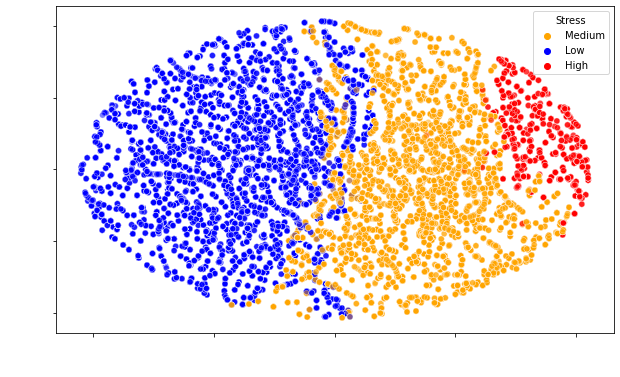

In [989]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=vis_x, y=vis_y,  hue= data_all['Stress'], palette=my_pal, alpha=0.5)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [1015]:
data_all.shape

(34621, 56)

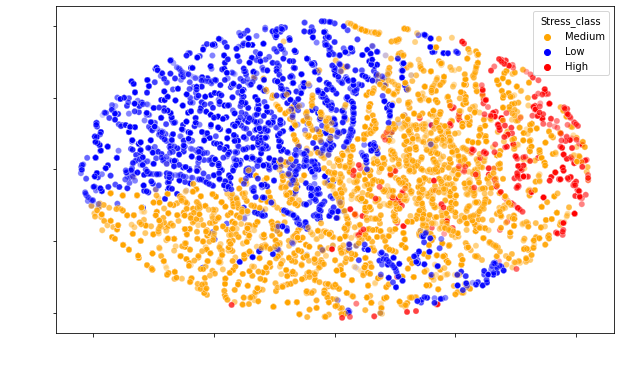

In [933]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=vis_x, y=vis_y, data= data_all, hue='Stress_class', palette=my_pal, alpha=0.2)
plt.xlabel('Deep learning based feature_1', size=15,color='white')
plt.ylabel('Deep learning based feature_2', size=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [1024]:
dt2c.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34611, 34612, 34613, 34614, 34615, 34616, 34617, 34618, 34619,
            34620],
           dtype='int64', length=34621)

In [1026]:
data_all.index = dt2c.index
data_all['trial_id'] = dt2c['trial_id']

data_all2 = data_all[['trial_id','Stress_class','Stress']]
data_all2.to_csv('Stress_characterization_LIRR_AutoEncoder.csv', index=False)

# Autoencoder 

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.initializers import VarianceScaling
from keras.optimizers import SGD
from keras.layers import Input
from keras.layers import Layer
from keras.layers import InputSpec

## Construct model 

In [1784]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected symmetric auto-encoder model.
  
    dims: list of the sizes of layers of encoder like [500, 500, 2000, 10]. 
          dims[0] is input dim, dims[-1] is size of the latent hidden layer.

    act: activation function
    
    return:
        (autoencoder_model, encoder_model): Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers of encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # latent hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded
    # internal layers of decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # decoder output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    
    decoded = x
    
    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model     = Model(inputs=input_data, outputs=encoded, name='encoder')
    
    return autoencoder_model, encoder_model

x = dt3c.values
n_epoc   = 200
batch_size = 56
dims = [x.shape[-1], 100, 100, 50, 50, 10, 10] 
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.001, momentum=0.9)
pretrain_epochs = n_epochs
batch_size = batch_size
save_dir = './results'
autoencoder, encoder = autoencoder(dims, init=init)

In [911]:
# from keras.utils import plot_model
# plot_model(autoencoder, to_file='encoder.png', show_shapes=True)
# from IPython.display import Image
# Image(filename='encoder.png')

## Pretain model 

In [1785]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs)
autoencoder.save_weights(save_dir + '/ae_weights.h5')

Epoch 1/200
619/619 [==============================] - 1s 2ms/step - loss: 0.3747
Epoch 2/200
619/619 [==============================] - 1s 1ms/step - loss: 0.1788
Epoch 3/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0419
Epoch 4/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 5/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0170
Epoch 6/200
619/619 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 7/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0170
Epoch 8/200
619/619 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 9/200
619/619 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 10/200
619/619 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 11/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0170
Epoch 12/200
619/619 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 13/200


619/619 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 197/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 198/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 199/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 200/200
619/619 [==============================] - 1s 2ms/step - loss: 0.0169


In [1786]:
autoencoder.save_weights(save_dir + '/ae_weights.h5')
autoencoder.load_weights(save_dir + '/ae_weights.h5')

## Add clustering layer

In [1787]:
class ClusteringLayer(Layer):
    '''
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.
    '''

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform') 
        
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        ''' 
        student t-distribution, as used in t-SNE algorithm.
        It measures the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
       
        inputs: the variable containing data, shape=(n_samples, n_features)
        
        Return: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        '''
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure all of the values of each sample sum up to 1.
        
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [1788]:
n_clusters = 40
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

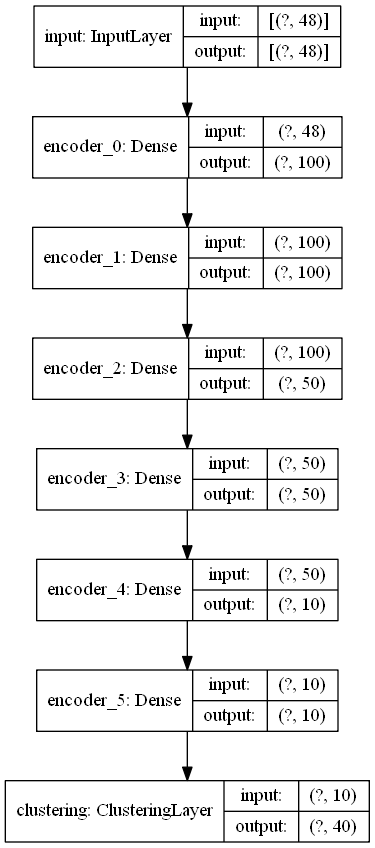

In [1789]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [1790]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
ts= encoder.predict(x)
ts = pd.DataFrame(ts)

kmeans = KMeans(n_clusters=n_clusters, n_init=10)
y_pred = kmeans.fit_predict(encoder.predict(x))
ct2 = kmeans.cluster_centers_
# ts['class'] = dt3['Stress_class']
# ts['class'].value_counts()
# ct2 = ts.groupby(['class']).mean()
# ct2 = ct2.to_numpy()
# print(type(ct2))
# ct2.shape

In [1791]:
model.compile(optimizer=SGD(0.001, 0.9), loss='kld')
model.get_layer(name='clustering').set_weights([ct2])

In [1792]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

loss = 0
index = 0
maxiter = 1000 
update_interval = 100 
tol = 0.001 # tolerance threshold to stop training
index_array = np.arange(x.shape[0])

for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_final.h5')

In [1793]:
model.load_weights(save_dir + '/DEC_model_final.h5')

In [1794]:
q = model.predict(x, verbose=0)
p = target_distribution(q) 
y_pred = q.argmax(1)

data_all = dt3.copy()
data_all['Cluster'] = y_pred
#data_all['Cluster'].value_counts()

### Jointly refine  DEC model 

In [1795]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_data, outputs=decoded, name='AE'), Model(inputs=input_data, outputs=encoded, name='encoder')

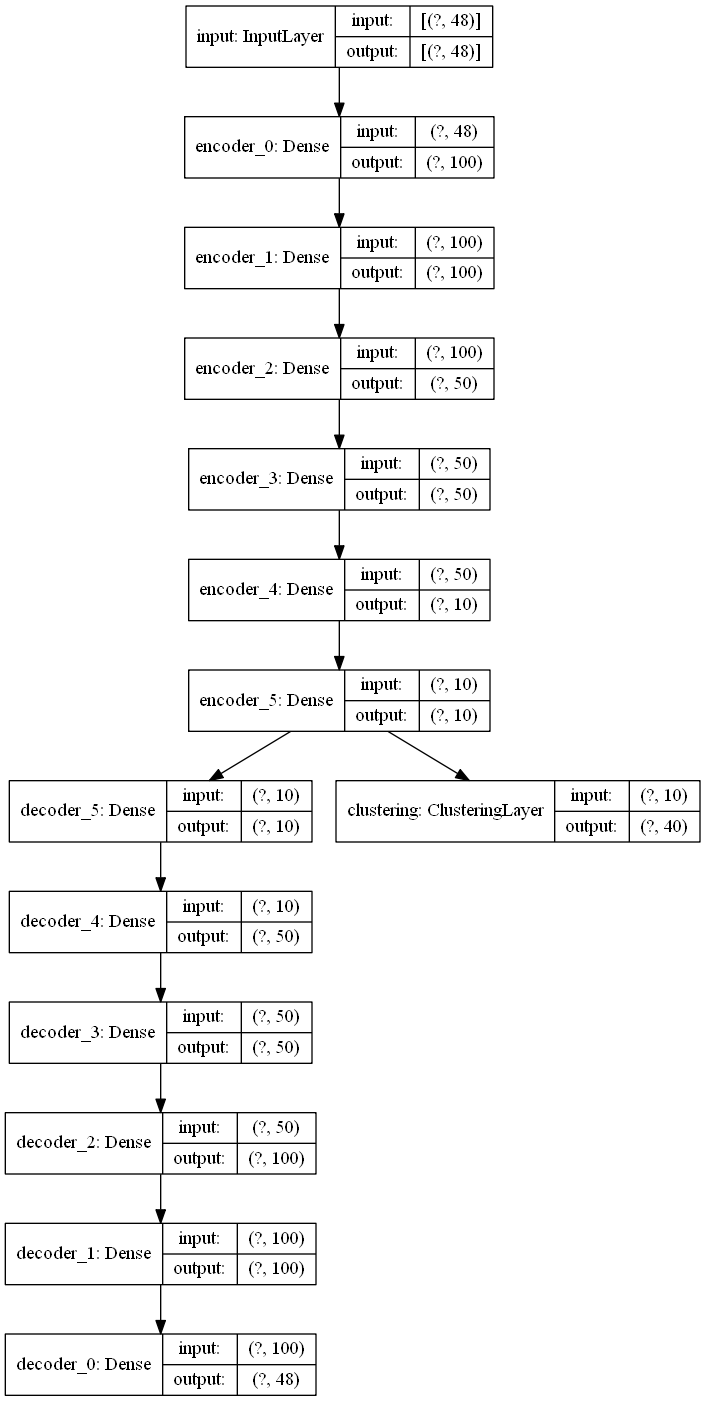

In [1796]:
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.load_weights(save_dir + '/ae_weights.h5')
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=[clustering_layer, autoencoder.output])

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 

In [1797]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
y_pred = kmeans.fit_predict(encoder.predict(x))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])
y_pred_last = np.copy(y_pred)

model.compile(loss=['kld', 'mse'], loss_weights=[0.1, 1], optimizer=pretrain_optimizer)

In [1798]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q, _  = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)

        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=[p[idx], x[idx]])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights(save_dir + '/b_DEC_model_final.h5')

In [1799]:
model.load_weights(save_dir + '/b_DEC_model_final.h5')

## Prediction and visualization 

In [1800]:
q, _ = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)

data_all = dt3.copy()
data_all['Cluster'] = y_pred
#print(data_all['Cluster'].value_counts())

# Histogram plot for original stress variables

In [901]:
data_all = feas.copy()
feas.columns

sns.set(font_scale=1.2)
dt_hs = data_all.copy()
plt.figure(figsize=(8,5))
my_pal = {"High": "red", "Medium": "orange", "Low":"blue"}

<Figure size 576x360 with 0 Axes>

In [998]:
var=feas.columns[38]
#var = 'yield_gap'
var

'rhavgVT.R2'

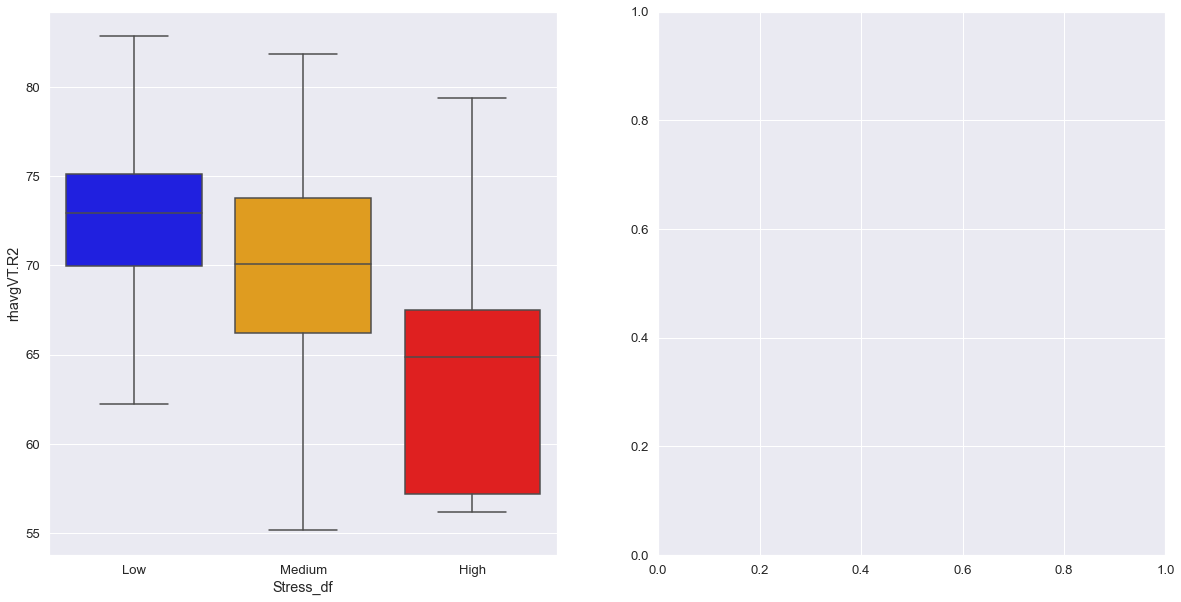

In [999]:
plt.rcParams['figure.figsize']=(20,10)

fig, axs = plt.subplots(ncols=2)
# my_order = data_all.loc[data_all.Stress_df!='High'].groupby(by=["Stress_df"])[var].mean().sort_values(ascending=False).index
# sns.boxplot(x=data_all['Stress_df'], y=dt_hs[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[0])
# my_order = data_all.loc[data_all.Stress_class!='High'].groupby(by=["Stress_class"])[var].mean().sort_values(ascending=False).index
# sns.boxplot(x=data_all['Stress_class'], y=dt_hs[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[1])

my_order = data_all.groupby(by=["Stress_df"])[var].mean().sort_values(ascending=False).index
sns.boxplot(x=data_all['Stress_df'], y=dt_hs[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[0])
# my_order = data_all.groupby(by=["Stress_class"])[var].mean().sort_values(ascending=False).index
# sns.boxplot(x=data_all['Stress_class'], y=dt_hs[var], showfliers = False, palette=my_pal, order=my_order, ax=axs[1])


plt.show()

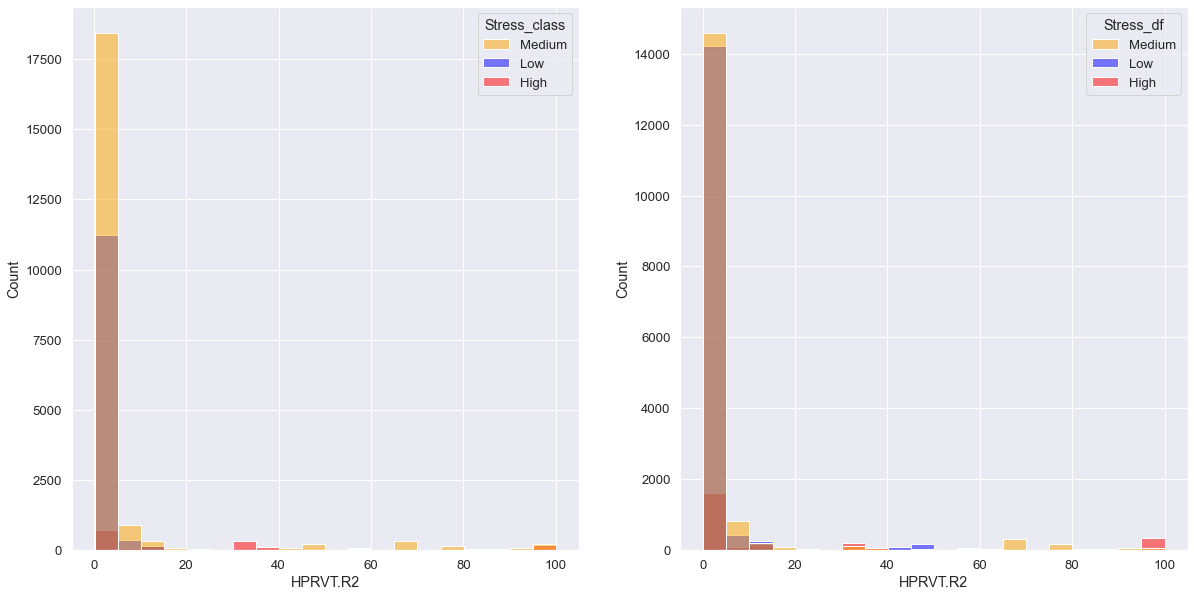

In [259]:
plt.rcParams['figure.figsize']=(20,10)

fig, axs = plt.subplots(ncols=2)
#sns.histplot(x=dt_hs[var], hue=data_all["Stress_ori"] , palette=my_pal,  ax=axs[0],bins=20)
sns.histplot(x=dt_hs[var],  hue=data_all['Stress_class'], palette=my_pal, ax=axs[0],bins=20)
sns.histplot(x=dt_hs[var],hue=data_all['Stress_df'],  palette=my_pal, ax=axs[1],bins=20)

plt.show()

# Evaluate two approaches 

In [253]:
at = pd.read_csv('Stress_characterization_LIRR_AutoEncoder.csv')
df = pd.read_csv('Stress_characterization_LIRR_DeepFeature.csv')
cla = pd.read_csv('DH_stress_NA_Corn_West_Market_Segment_LIRR.csv')
#df = pd.read_csv('DF2.csv')

In [644]:
dt.shape

dtaa = pd.merge(dt, dt_cp, on='trial_id')
dtaa.shape

(65964, 82)

In [646]:
dtaa.columns

Index(['trial_id', 'WaterDeficit30DBP.Planting', 'WaterDeficitPlanting.VE',
       'WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6', 'WaterDeficitR6.Harvest',
       'Heat30DBP.Planting', 'HeatPlanting.VE', 'HeatVE.V6', 'HeatV6.VT',
       'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6', 'HeatR6.Harvest',
       'VaporPressureDeficit30DBP.Planting', 'VaporPressureDeficitPlanting.VE',
       'VaporPressureDeficitVE.V6', 'VaporPressureDeficitV6.VT',
       'VaporPressureDeficitVT.R2', 'VaporPressureDeficitR2.R4',
       'VaporPressureDeficitR4.R6', 'VaporPressureDeficitR6.Harvest',
       'vpdmax30DBP.Planting', 'vpdmaxPlanting.VE', 'vpdmaxVE.V6',
       'vpdmaxV6.VT', 'vpdmaxVT.R2', 'vpdmaxR2.R4', 'vpdmaxR4.R6',
       'vpdmaxR6.Harvest', 'et0sum30DBP.Planting', 'et0sumPlanting.VE',
       'et0sumVE.V6', 'et0sumV6.VT', 'et0sumVT.R2', 'et0sumR2.R4',
       'et0sumR4.R6', 'et0sumR6.Harvest', 'tempmax30DBP.Planting',
       'tempmaxPlanti

In [982]:
feas = dfs.copy()
# feas['Stress_df'] = feas['Stress_x']
# feas['Stress_class'] = feas['Stress_y']

# feas['Stress_at'] = at['Stress']
feas['Stress_df'] = dfs['Stress']
#feas['Stress_class'] = dfs['Stress_class']
# feas['Stress_df'] = dfs['Stress']
#feas['Stress_class_at'] = at['Stress_class']
#feas['Stress_class'] = df['Stress_class']
#feas = pd.merge(feas, cla, on=['trial_id'])
feas.columns

Index(['trial_id', 'wsy_c', 'WaterDeficit30DBP.Planting',
       'WaterDeficitPlanting.VE', 'WaterDeficitVE.V6', 'WaterDeficitV6.VT',
       'WaterDeficitVT.R2', 'WaterDeficitR2.R4', 'WaterDeficitR4.R6',
       'WaterDeficitR6.Harvest', 'Heat30DBP.Planting', 'HeatPlanting.VE',
       'HeatVE.V6', 'HeatV6.VT', 'HeatVT.R2', 'HeatR2.R4', 'HeatR4.R6',
       'HeatR6.Harvest', 'VaporPressureDeficit30DBP.Planting',
       'VaporPressureDeficitPlanting.VE', 'VaporPressureDeficitVE.V6',
       'VaporPressureDeficitV6.VT', 'VaporPressureDeficitVT.R2',
       'VaporPressureDeficitR2.R4', 'VaporPressureDeficitR4.R6',
       'VaporPressureDeficitR6.Harvest', 'et0sum30DBP.Planting',
       'et0sumPlanting.VE', 'et0sumVE.V6', 'et0sumV6.VT', 'et0sumVT.R2',
       'et0sumR2.R4', 'et0sumR4.R6', 'et0sumR6.Harvest', 'rhavg30DBP.Planting',
       'rhavgPlanting.VE', 'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2',
       'rhavgR2.R4', 'rhavgR4.R6', 'rhavgR6.Harvest', 'year',
       'GrainYieldPotential', 'HPR30B

In [889]:
feas.groupby(['Stress_class','Stress_df']).size()

Stress_class  Stress_df
High          High            46
              Medium          69
Low           High             7
              Low          40872
              Medium        9969
Medium        High           279
              Low          12027
              Medium       18831
dtype: int64

In [890]:
(1455+10950+13488)/feas.shape[0]

0.3153836784409257

In [846]:
#dt3.columns

In [895]:
feas2 = feas[['WaterDeficitVE.V6', 'WaterDeficitV6.VT', 'WaterDeficitVT.R2',
       'WaterDeficitR2.R4', 'WaterDeficitR4.R6',  
       'VaporPressureDeficitVE.V6', 'VaporPressureDeficitV6.VT',
       'VaporPressureDeficitVT.R2', 'VaporPressureDeficitR2.R4',
       'VaporPressureDeficitR4.R6',   
       'rhavgVE.V6', 'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
      'HPRVE.V6', 'HPRV6.VT', 'HPRVT.R2', 'HPRR2.R4',
       'HPRR4.R6',  'Stress_df', 'Stress_class']]

In [892]:
#feas2 = feas[['Stress_at','Stress_df','Stress_ori', 'ygsmn','yield_gap', 'Stress_class']]
feas2 = feas[['Stress_df','ygsmn','yield_gap', 'Stress_class']]

#feas3 = feas[['Stress_at','Stress_df',  
 #      'et0sumV6.VT', 'et0sumVT.R2', 'et0sumR2.R4', 'et0sumR4.R6',  'rhavgV6.VT', 'rhavgVT.R2', 'rhavgR2.R4', 'rhavgR4.R6',
  #           'HPRVE.V6','ygsmn']]

In [896]:
qts = [0.1, 0.25,0.5,0.75,0.9]
#vars_at= []
vars_df= []
vars_class = []
#vars_ori = []
for qt in qts:
    #var_at= feas2.groupby(['Stress_at']).quantile(qt)
#     var_df= feas2.groupby(['Stress_df']).quantile(qt)
#     var_class= feas2.groupby(['Stress_class']).quantile(qt)
#     var_ori= feas2.groupby(['Stress_ori']).quantile(qt)
#     var_at= feas2.loc[feas2.Stress_at!='High'].groupby(['Stress_at']).quantile(qt)
    var_df= feas2.loc[feas2.Stress_df!='High'].groupby(['Stress_df']).quantile(qt)
    var_class= feas2.loc[feas2.Stress_class!='High'].groupby(['Stress_class']).quantile(qt)
#     var_ori= feas2.loc[feas2.Stress_ori!='High'].groupby(['Stress_ori']).quantile(qt)
    
    
  #  var_at2 = var_at.std(axis=0)
    var_df2 = var_df.std(axis=0)
    var_class2 = var_class.std(axis=0)
   # var_ori2 = var_ori.std(axis=0)
    
    vars_at.append(var_at2)
    vars_df.append(var_df2)
    vars_class.append(var_class2)
    #vars_ori.append(var_ori2)

In [897]:
vars_at2 = np.asarray(vars_at).flatten()
vars_df2 = np.asarray(vars_df).flatten()
vars_class2 = np.asarray(vars_class).flatten()
vars_ori2 = np.asarray(vars_ori).flatten()

ts = vars_df2 > vars_class2
pd.DataFrame(ts).value_counts()

False    73
True     27
dtype: int64

ValueError: arrays must all be same length

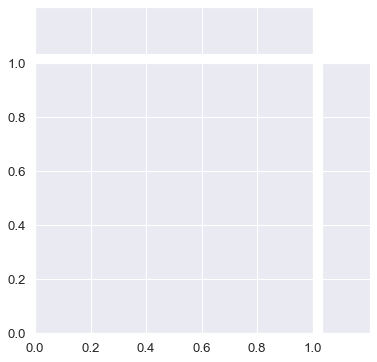

In [663]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.JointGrid(vars_df2, vars_ori2, space=0, size=6)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 60], [0, 60],'b-', linewidth=2)
plt.xlabel('DF')
plt.ylabel('Class')
plt.show()

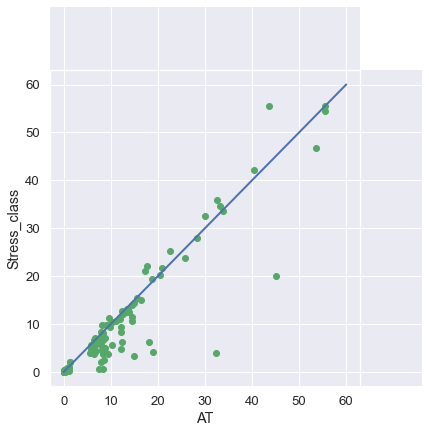

In [1223]:
grid = sns.JointGrid(vars_at2, vars_class2, space=0, size=6)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 60], [0, 60],'b-', linewidth=2)
plt.xlabel('AT')
plt.ylabel('Stress_class')
plt.show()

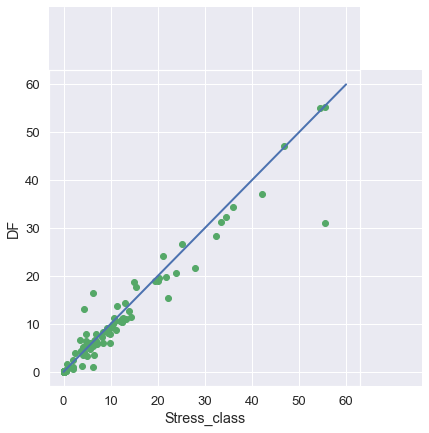

In [1224]:
grid = sns.JointGrid(vars_class2, vars_df2, space=0, size=6)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 60], [0, 60],'b-', linewidth=2)
plt.xlabel('Stress_class')
plt.ylabel('DF')
plt.show()